<img src="TitlePage.png", width="800">

<h1 align="center">Youtube Views Generator</h1>

## Practical Motivation
**YouTube content creators are constantly creating new videos daily to increase viewership. However, they are unaware of the crucial factors in their videos that can drive their views per video up.**

<h3 align="center">End-goal: A tool for creators to improve and recommend video tags to increase views.</h1>
___

## Contents:
1. Imports
2. Exploratory Data Analysis
3. Data Preparation
4. Predicting views with numeric variables
5. Attempt to apply a model to predict views using date, time variable
6. Predicting views with string variable: tags
7. Conclusion
---

## Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from nltk.stem import PorterStemmer
import nltk
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words


In [2]:
# Setting options for ease of viewing
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Importing dataset

In [3]:
ydata = pd.read_csv('USvideos.csv')
ydata.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<code style="background:yellow;color:black"><strong>Check the vital statistics of the dataset using the type and shape attributes.</strong></code>

In [4]:
print("Data type : ", type(ydata))
print("Data dims : ", ydata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (40949, 16)


In [5]:
print(ydata.isnull().values.any())

True


In [6]:
ydata = ydata.dropna(how='any',axis=0)

In [7]:
print(ydata.isnull().values.any())

False


In [8]:
ydata.apply(lambda x: len(x.unique()))

video_id                   6254
trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
thumbnail_link             6255
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

<code style="background:yellow;color:black"><strong>Check the variables (and their types) in the dataset using the dtypes attribute.</strong></code>

In [9]:
print(ydata.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [10]:
numeric_data = pd.DataFrame(ydata[["category_id", "views", "likes", "dislikes", "comment_count"]]).copy()
cats = pd.DataFrame(ydata[['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description']])
numeric_data.describe().round(2)

,category_id,views,likes,dislikes,comment_count
count,40379.00000,40379.00000,40379.00000,40379.00000,40379.00000
mean,19.94000,2370838.72000,74616.77000,3508.12000,8287.40000
std,7.59000,7428515.36000,229617.24000,23174.86000,34316.05000
min,1.00000,549.00000,0.00000,0.00000,0.00000
25%,17.00000,247076.00000,5621.50000,205.00000,623.00000
50%,24.00000,689597.00000,18371.00000,637.00000,1874.00000
75%,25.00000,1834912.50000,55672.00000,1948.00000,5787.00000
max,43.00000,225211923.00000,5613827.00000,1643059.00000,1228655.00000


In [11]:
cats.describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40379,40379,40379,40379,40379,40379,40379,40379,40379
unique,205,6357,2142,6172,6008,2,2,2,6901
top,18.25.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,200,30,203,50,1260,39775,40210,40358,58


---
<h1 align="center">Exploratory Data Analysis</h1>

## Draw the distributions of all numeric variables

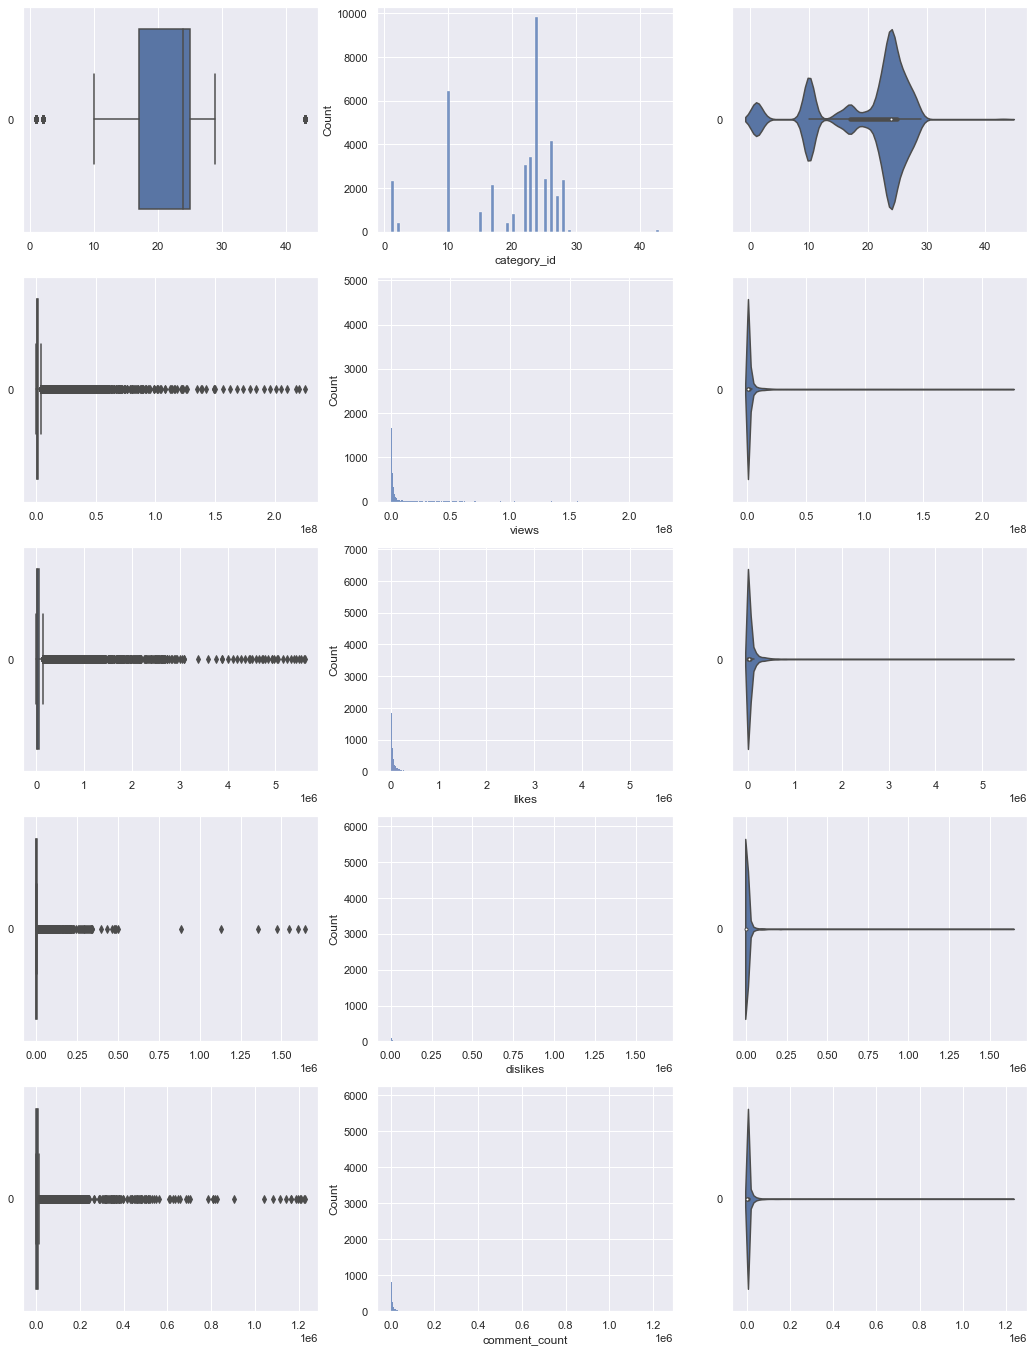

In [13]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

<code style="background:yellow;color:black"><strong>As we can see, the distributions are all mostly skewed, thus we apply log on them.</strong></code>

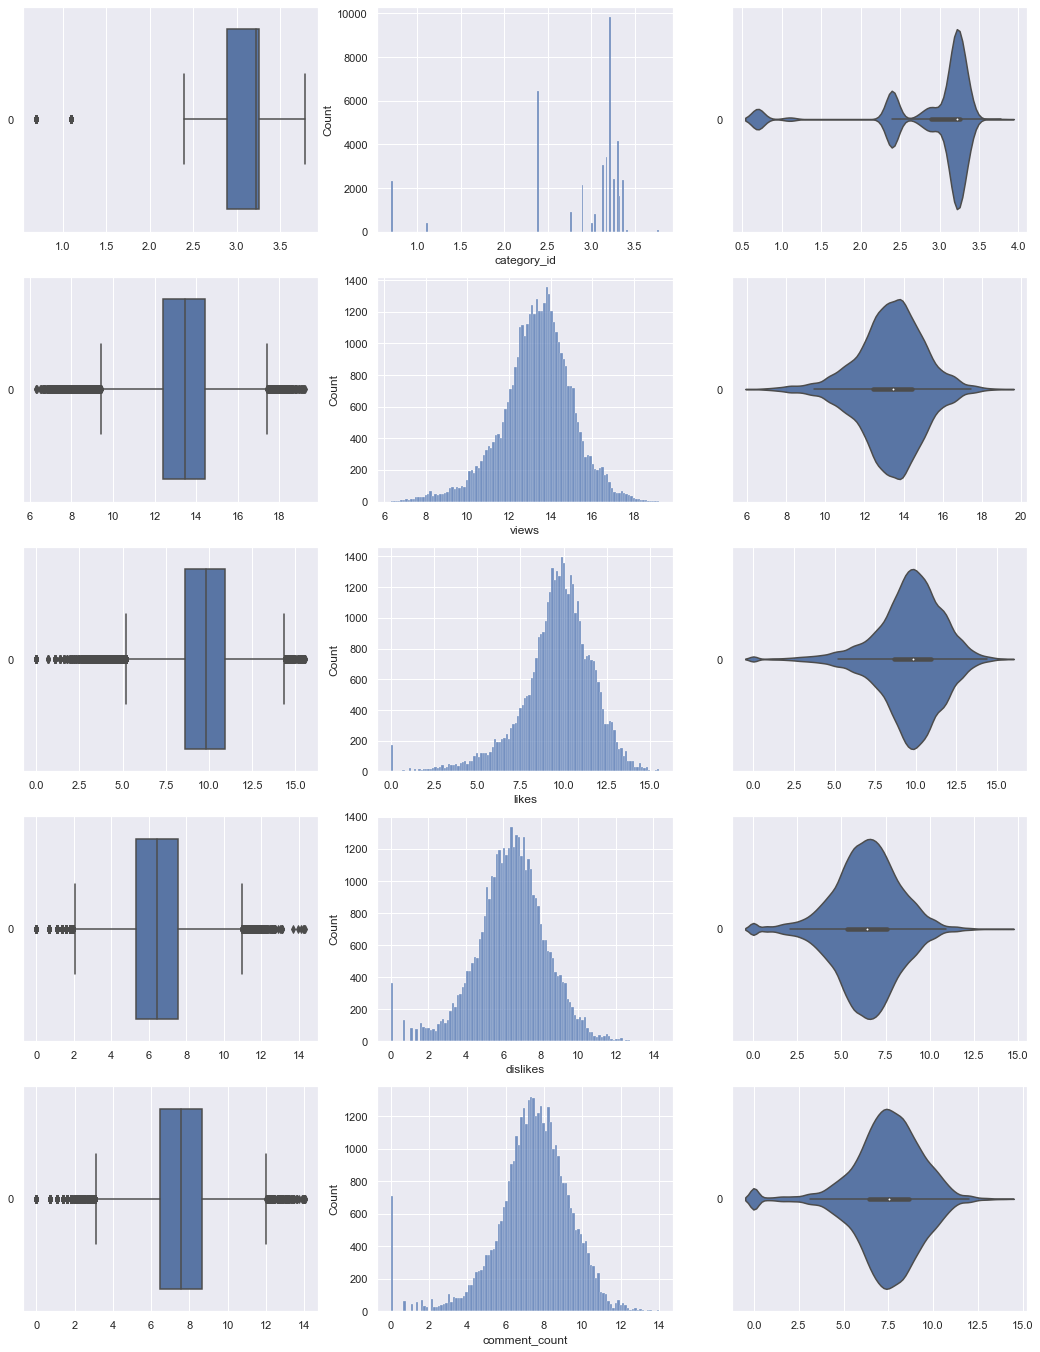

In [14]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = pd.Series(np.log1p(numeric_data[var])), orient = "h", ax = axes[count,0])
    sb.histplot(data = pd.Series(np.log1p(numeric_data[var])), ax = axes[count,1])
    sb.violinplot(data = pd.Series(np.log1p(numeric_data[var])), orient = "h", ax = axes[count,2])
    count += 1

<code style="background:yellow;color:black"><strong>We let viewcounts in q3 and above (75%) to be considered as videos whose view count is "well-performed"</strong></code>

In [15]:
# Create new column to categorize videos with well-performed viewcounts
ydata['highview'] = np.where(ydata['views']>1823157, 1, 0)
print("Count by data of highview:\n",ydata['highview'].value_counts())
print()
print("Total size of data: ",ydata.shape)

Count by data of highview:
 0    30227
1    10152
Name: highview, dtype: int64

Total size of data:  (40379, 17)


## Forming new columns from data

In [16]:
#No of tags
tags=[x.count("|")+1 for x in ydata["tags"]]
ydata["No_tags"]=tags

In [17]:
#length of title
title_len=[len(x) for x in ydata["title"]]
ydata["len_title"]=title_len

In [18]:
desc_len=[len(x) for x in ydata["description"]]
ydata["desc_len"]=desc_len

In [19]:
#ratio of view/likes  upto 3 decimal
ydata["Ratio_View_likes"]=round(ydata["views"]/ydata["likes"],3)
#ratio of view/dislikes  upto 3 decimal
ydata["Ratio_View_dislikes"]=round(ydata["views"]/ydata["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
ydata["Ratio_views_comment_count"]=round(ydata["views"]/ydata["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
ydata["Ratio_likes_dislikes"]=round(ydata["likes"]/ydata["dislikes"],3)

In [20]:
ydata["publish_time_new"] = pd.to_datetime(ydata["publish_time"]).dt.strftime("%w").astype(int)

In [21]:
numeric_data = pd.DataFrame(ydata[["category_id", "views", "likes", "dislikes", "comment_count",'No_tags','len_title','desc_len','publish_time_new',"Ratio_View_likes","Ratio_View_dislikes","Ratio_views_comment_count","Ratio_likes_dislikes"]]).copy()

<AxesSubplot:>

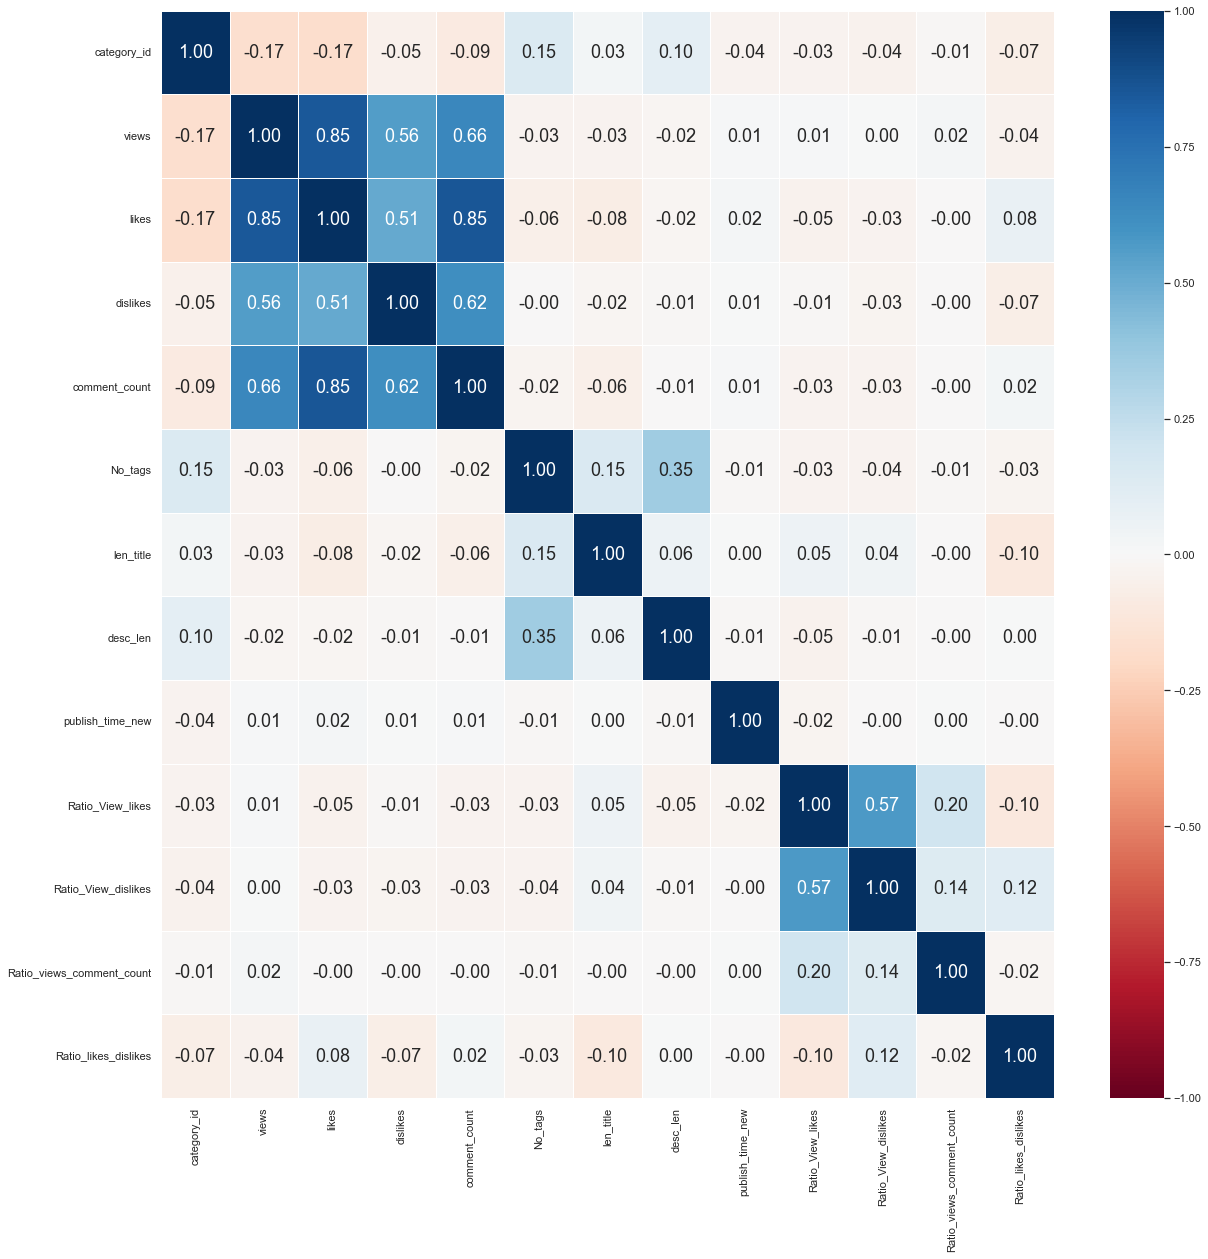

In [22]:
# Correlation Matrix

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<code style="background:yellow;color:black"><strong>As we can see likes, dislikes and comment count have high correlation,No_tags,len_title, category_id have possible correlation that we will discover further. Whereas there isn't much correlation for publish_time for now, however we shall explore that as well.</strong></code>

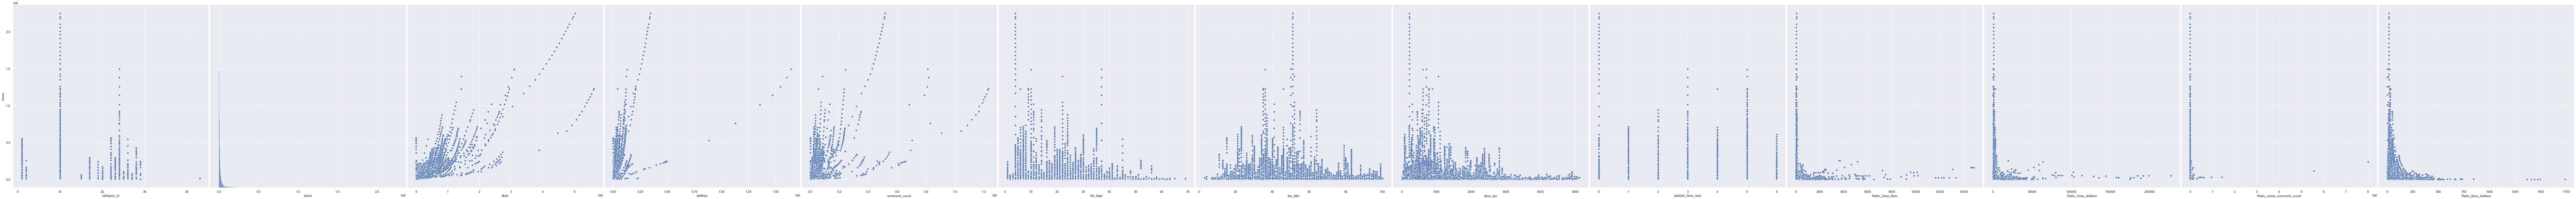

In [23]:
g=sb.pairplot(
    data=numeric_data,
    x_vars=numeric_data,
    y_vars=["views"],height=10, aspect=1
)


<code style="background:yellow;color:black"><strong>For numeric data, top best correlation is comment_count and likes</strong></code>

## Exploring tags

In [24]:
# Make two datasets, new and old, new where videos are published within 5 years.
ydata['publish_year'] = pd.DatetimeIndex(ydata['publish_time']).year
data_oldyear = ydata[ydata['publish_year'] < 2018]
data_newyear = ydata[ydata['publish_year'] > 2017]

data_oldyear_highv = data_oldyear[data_oldyear['highview']==1]
data_newyear_highv = data_newyear[data_newyear['highview']==1]

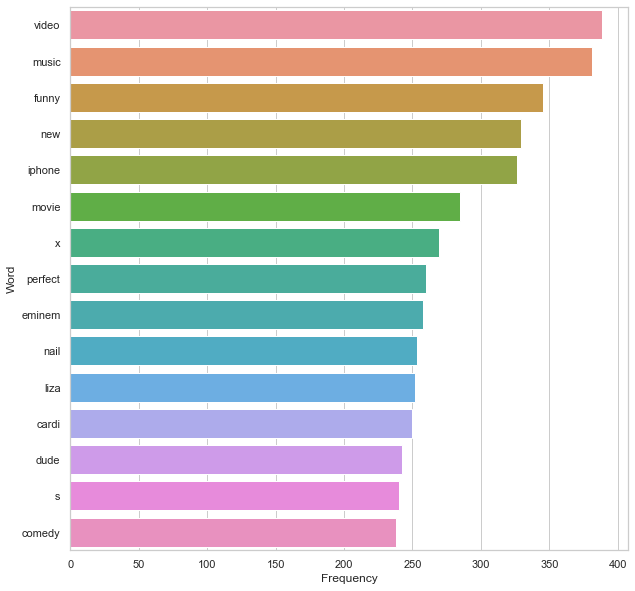

In [25]:
# Clean the tags column
# Remove special characters and stopwords
tags_oldyear = data_oldyear_highv['tags'].str.lower().str.cat(sep=' ')
tags_oldyear = re.sub('[^A-Za-z]+', ' ', tags_oldyear)
stopword = list(get_stop_words('en'))
#nltkword = list(stopwords.words('english'))
#stopword.extend(nltkword)
nostopword_old = []
tokenized_old = word_tokenize(tags_oldyear)
#nostopword_old = [buff for buff in tokenized_old if not buff in stopword]
for buff in tokenized_old:
    if buff not in stopword:
        nostopword_old.append(buff)
        
worddist_old = nltk.FreqDist(nostopword_old)
worddistrs_old = pd.DataFrame(worddist_old.most_common(15),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.barplot(y="Word",x="Frequency", data=worddistrs_old.head(15))


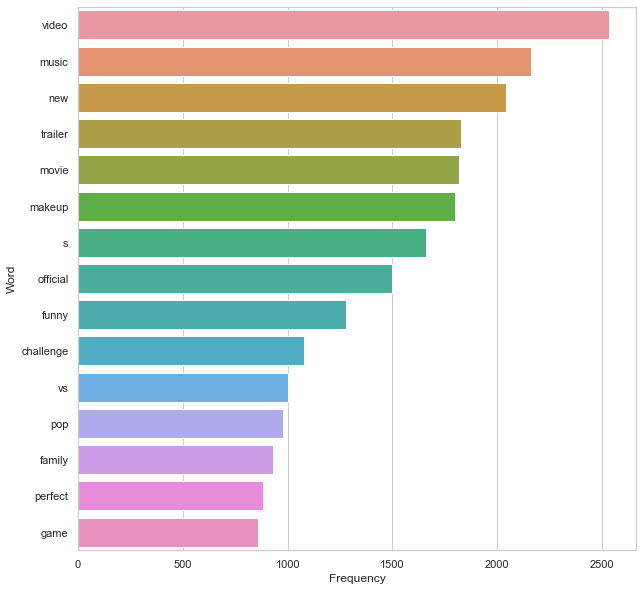

In [26]:
# Clean the tags column
# Remove special characters and stopwords
tags_newyear = data_newyear_highv['tags'].str.lower().str.cat(sep=' ')
tags_newyear = re.sub('[^A-Za-z]+', ' ', tags_newyear)

nostopword_new = []
tokenized_new = word_tokenize(tags_newyear)
#nostopword_old = [buff for buff in tokenized_old if not buff in stopword]
for buff in tokenized_new:
    if buff not in stopword:
        nostopword_new.append(buff)
        
worddist_new = nltk.FreqDist(nostopword_new)
worddistrs_new = pd.DataFrame(worddist_new.most_common(15),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.barplot(y="Word",x="Frequency", data=worddistrs_new.head(15))

In [27]:
# Create a new column with the cleaned tags, disregarding high views
data_newyear['tags_clean'] = data_newyear['tags'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
data_newyear['tags_clean'] = data_newyear['tags_clean'].str.replace(r'[^A-Za-z]+', ' ', regex=True).astype('object')

data_newyear['tags_clean'] 

9800     Netflix Trailer Netflix Original Series Netfli...
9801     ricky gervais karl pilkington black mirror bla...
9802     mr sunday movies the weekly planet luke skywal...
9803     Fifty Shades Grey Official Teaser Teaser Trail...
9805     Britney Spears icon Toxic Full HD New Year s E...
                               ...                        
40943    BuzzFeed BuzzFeedVideo Puppy Interview puppy j...
40944    aarons animals aarons animals cat cats kitten ...
40946    I gave safiya nygaard perfect hair makeover ba...
40947    Black Panther HISHE Marvel Infinity War How It...
40948                  call duty cod activision Black Ops 
Name: tags_clean, Length: 29909, dtype: object

## Checking if publish_time has any relationship with views

In [28]:
from datetime import datetime
df = pd.DataFrame(ydata[["publish_time","views","category_id","trending_date"]]).copy()
df["publish_time_new"] = pd.to_datetime(df["publish_time"]).dt.strftime("%w%H")
df['trending_date']= pd.to_datetime(df['trending_date'], format="%y.%d.%m")
df["trending_date"] = pd.to_datetime(df["trending_date"]).dt.strftime("%d%m%y")

print( df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40948
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   publish_time      40379 non-null  object
 1   views             40379 non-null  int64 
 2   category_id       40379 non-null  int64 
 3   trending_date     40379 non-null  object
 4   publish_time_new  40379 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.9+ MB
None


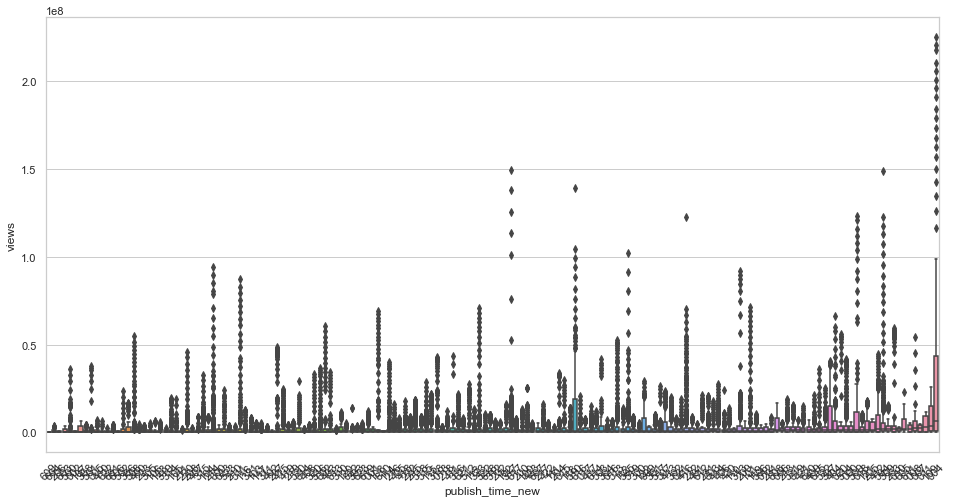

In [29]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'publish_time_new', y = 'views', data = df, 
           order = df.groupby('publish_time_new')['views'].median().sort_values().index)
plt.xticks(rotation=45);

In [30]:
# Clearing outliers


# Calculate the quartiles
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
new_df=df[(df['views']<upper)&(df['views']>lower)]



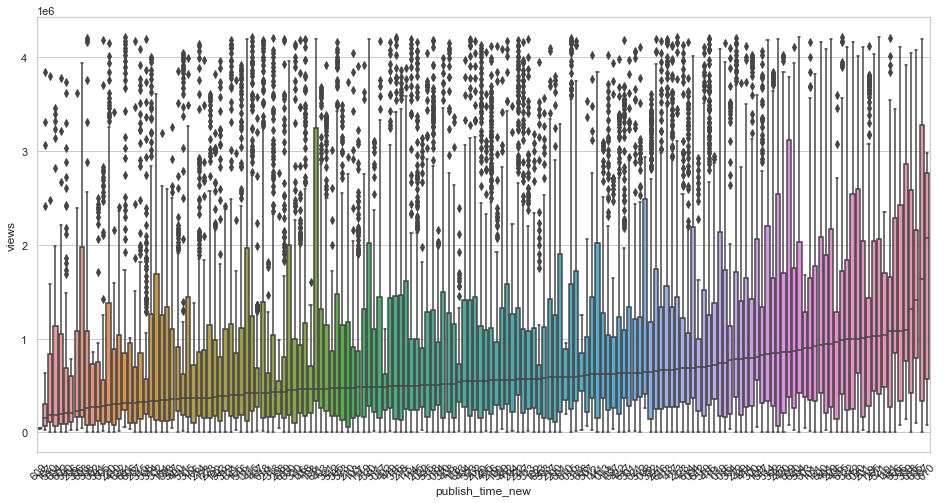

In [31]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'publish_time_new', y = 'views', data = new_df, 
           order = new_df.groupby('publish_time_new')['views'].median().sort_values().index)
plt.xticks(rotation=45);

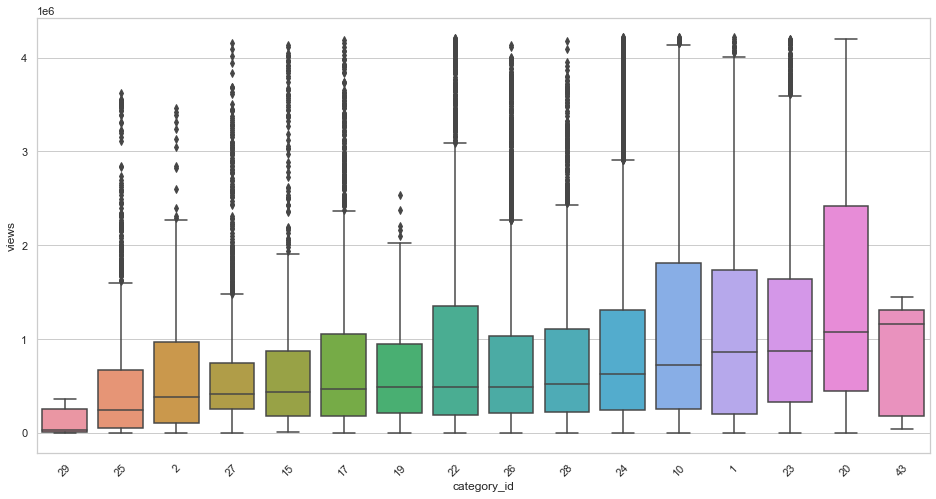

In [32]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'category_id', y = 'views', data = new_df, 
           order = new_df.groupby('category_id')['views'].median().sort_values().index)
plt.xticks(rotation=45);


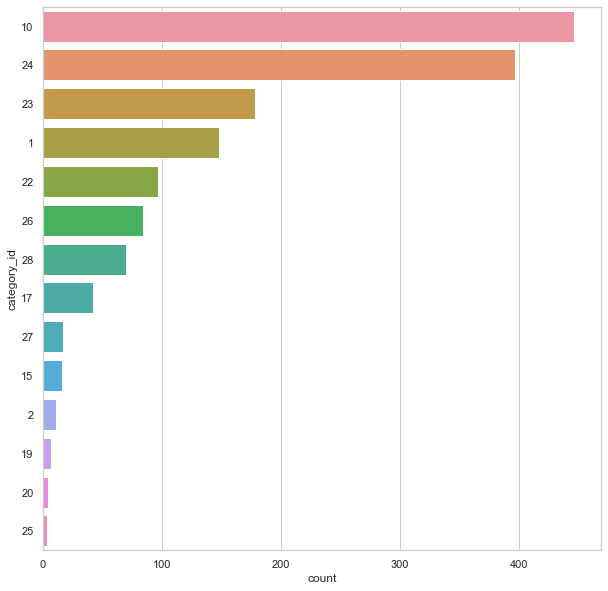

In [33]:
plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.countplot(y="category_id",data=data_oldyear_highv,order = data_oldyear_highv['category_id'].value_counts().index)

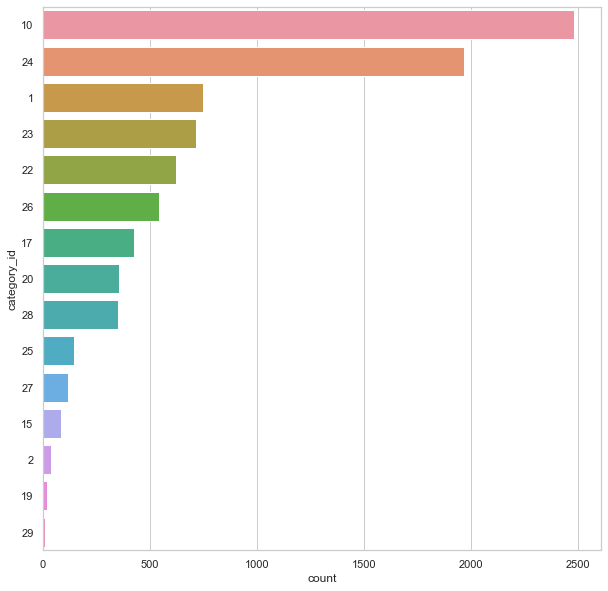

In [34]:
plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.countplot(y="category_id",data=data_newyear_highv,order = data_newyear_highv['category_id'].value_counts().index)

<code style="background:yellow;color:black"><strong>As we can see from the comparison of high views dataset from before 2018 and after 2017, there is a trend for the highest frequency category_id, which shows that some categories are favored to have more views than others.<strong></code>
<br>
<br>
<strong>For understanding of what these numbers mean, you can refer to the link below.</strong>
<br>
[Youtube Category ID Meanings](https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/)

## Looking for relationship between views against day, time, month, year

In [105]:
import datetime
new_df['publish_date'] = pd.to_datetime(ydata['publish_time']).copy()
new_df['publish_date'] = new_df['publish_date'].dt.strftime('%d.%m.%Y')
new_df['hour']=pd.DatetimeIndex(new_df['publish_time']).hour
new_df['year'] = pd.DatetimeIndex(new_df['publish_date']).year
new_df['month'] = pd.DatetimeIndex(new_df['publish_date']).month
new_df['day'] = pd.DatetimeIndex(new_df['publish_date']).day
new_df['weekday'] = pd.DatetimeIndex(new_df['publish_date']).weekday
new_df['views']=ydata['views'].copy()

date_data = pd.DataFrame(new_df[['hour', 'year', 'month', 'day','weekday']]).copy()

date_data

,hour,year,month,day,weekday
0,17,2017,11,13,0
1,7,2017,11,13,0
2,19,2017,12,11,0
3,11,2017,11,13,0
4,18,2017,12,11,0
...,...,...,...,...,...
40932,2,2018,5,22,1
40933,21,2018,5,20,6
40936,18,2018,5,20,6
40944,13,2018,5,18,4


In [106]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(date_data)
date_data_ohe = pd.DataFrame(ohe.transform(date_data).toarray(), 
                                  columns=ohe.get_feature_names_out(date_data.columns))

# Check the encoded variables
date_data_ohe


,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,year_2006,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000

In [37]:
print(date_data_ohe)

       hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
0     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000   
2     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
3     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
4     0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
35974 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
35975 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
35976 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
35977 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
35978 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   

       hour_9  ...  day_29 

In [98]:
pd.set_option("display.max_columns", None)
date_data_ohe.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,year_2006,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000

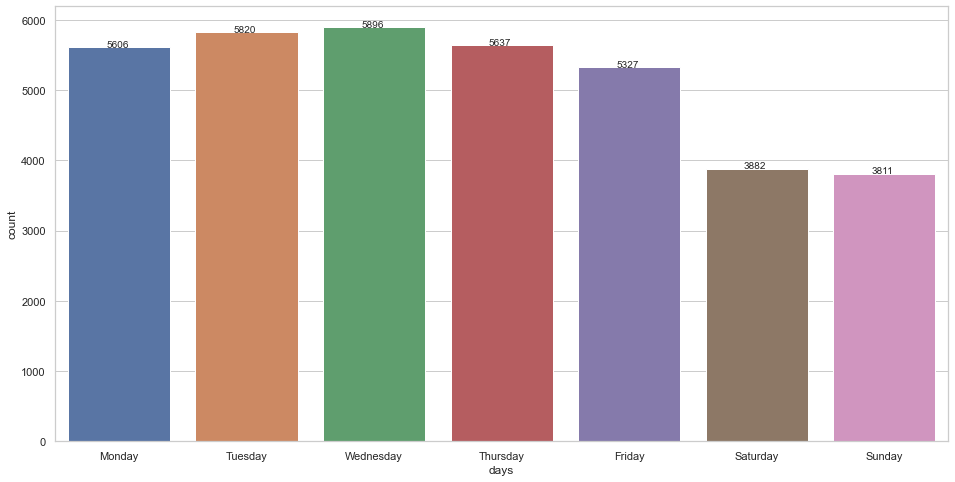

In [39]:
monday = pd.DataFrame(date_data_ohe['weekday_0'])
monday1 = pd.DataFrame(monday.replace(1.0, 'Monday'))
monday0 = pd.DataFrame(monday1.replace(0.0, ''))

tuesday = pd.DataFrame(date_data_ohe['weekday_1']) 
tuesday1 = pd.DataFrame(tuesday.replace(1.0, 'Tuesday'))
tuesday0 = pd.DataFrame(tuesday1.replace(0.0, ''))

wednesday = pd.DataFrame(date_data_ohe['weekday_2']) 
wednesday1 = pd.DataFrame(wednesday.replace(1.0, 'Wednesday'))
wednesday0 = pd.DataFrame(wednesday1.replace(0.0, ''))

thursday = pd.DataFrame(date_data_ohe['weekday_3']) 
thursday1 = pd.DataFrame(thursday.replace(1.0, 'Thursday'))
thursday0 = pd.DataFrame(thursday1.replace(0.0, ''))

friday = pd.DataFrame(date_data_ohe['weekday_4']) 
friday1 = pd.DataFrame(friday.replace(1.0, 'Friday'))
friday0 = pd.DataFrame(friday1.replace(0.0, ''))

saturday = pd.DataFrame(date_data_ohe['weekday_5']) 
saturday1 = pd.DataFrame(saturday.replace(1.0, 'Saturday'))
saturday0 = pd.DataFrame(saturday1.replace(0.0, ''))

sunday = pd.DataFrame(date_data_ohe['weekday_6']) 
sunday1 = pd.DataFrame(sunday.replace(1.0, 'Sunday'))
sunday0 = pd.DataFrame(sunday1.replace(0.0, ''))

daysconcat = pd.concat([monday0, tuesday0, wednesday0, thursday0, friday0, saturday0, sunday0], axis = 1)
daysconcat['days'] = daysconcat['weekday_0'] + daysconcat['weekday_1'] + daysconcat['weekday_2'] + daysconcat['weekday_3'] + daysconcat['weekday_4'] + daysconcat['weekday_5'] + daysconcat['weekday_6']
days = pd.DataFrame(daysconcat[["days"]])

df2 = pd.DataFrame({
    'days': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'num': [0, 1, 2, 3, 4, 5, 6]})
days = pd.merge(days, df2, on='days')
days = days.sort_values('num')

f = plt.figure(figsize=(16, 8))
daysplot = sb.countplot(x = "days", data = days) 
for p in daysplot.patches:
   daysplot.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01))

<code style="background:yellow;color:black"><strong>Weekdays have a higher number of videos posted as compared to weekends. For weekdays, >5000 videos are posted per day, while weekends have >3000 videos posted.</strong></code>

<Figure size 1152x576 with 0 Axes>

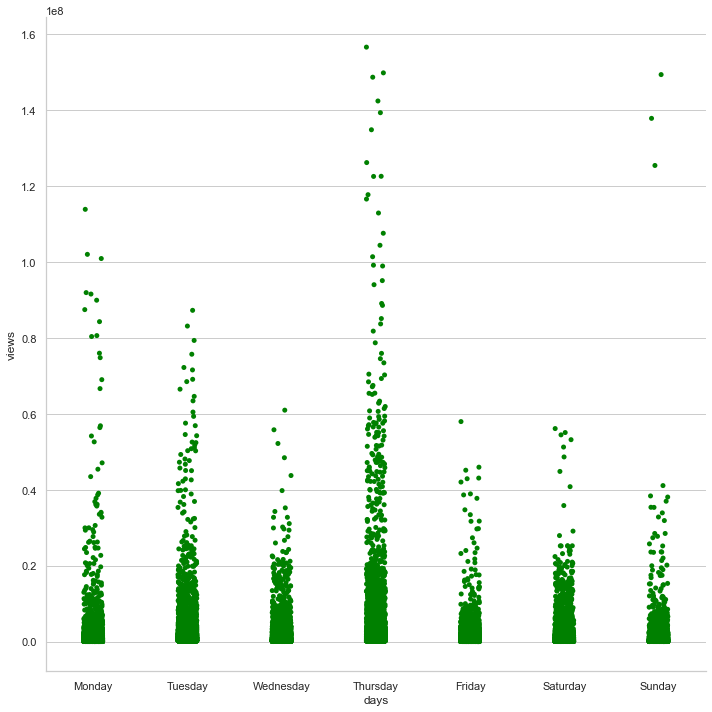

In [40]:
f = plt.figure(figsize=(16, 8))
views = pd.DataFrame(numeric_data[["views"]])
dailyviews = pd.concat([days, views], axis = 1)
sb.catplot(x="days", y="views", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], data=dailyviews, color='green', height=10)

In [41]:
# Calculate the quartiles
Q1 = dailyviews['views'].quantile(0.25)
Q3 = dailyviews['views'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
newdailyviews=dailyviews[(dailyviews['views']<upper)&(dailyviews['views']>lower)]

<AxesSubplot:xlabel='days', ylabel='views'>

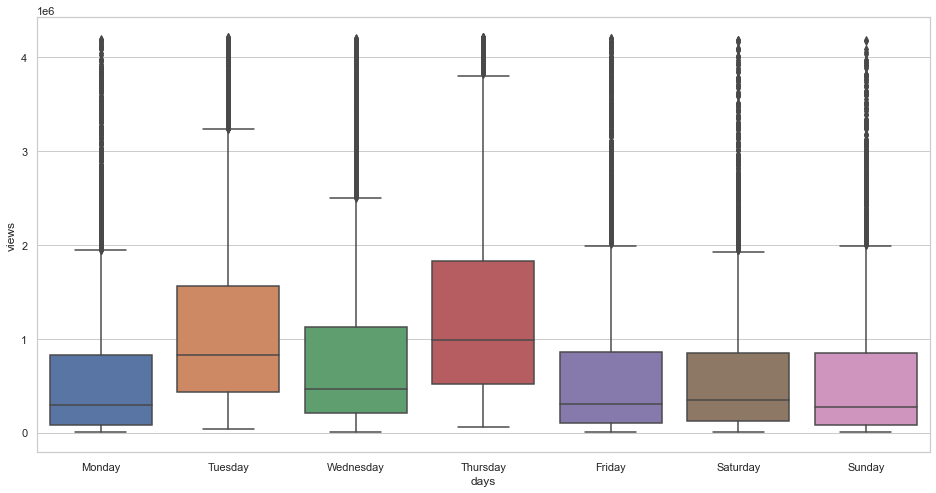

In [42]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="days", y="views", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], data=newdailyviews)

<code style="background:yellow;color:black"><strong>Thursday has the highest median number of views at 1 million, with Tuesday having the second-highest median views being slightly lower than 1 million views</strong></code>

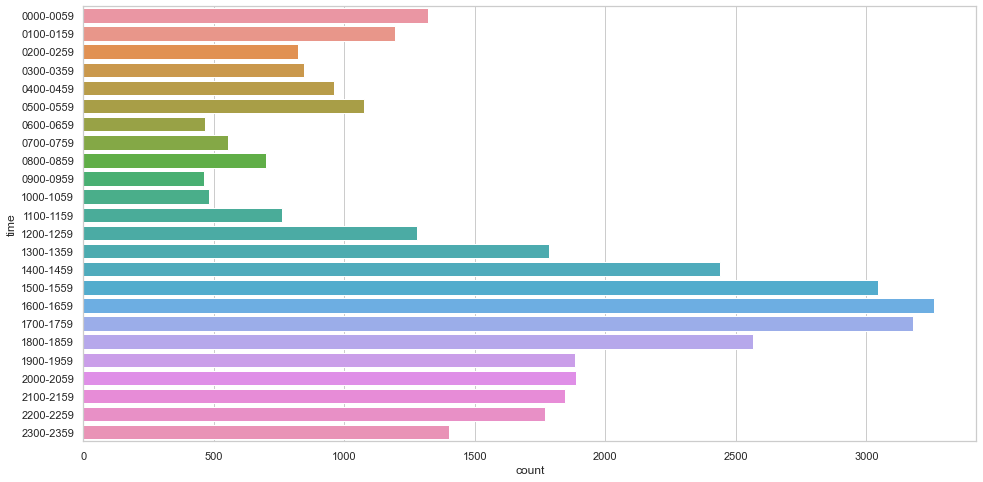

In [43]:
time1hr = pd.DataFrame(date_data_ohe[["hour_0"]])
time1hr1 = pd.DataFrame(time1hr.replace(1.0, '0000-0059'))
time1hr0 = pd.DataFrame(time1hr1.replace(0.0, ''))

time2hr = pd.DataFrame(date_data_ohe[["hour_1"]])
time2hr1 = pd.DataFrame(time2hr.replace(1.0, '0100-0159'))
time2hr0 = pd.DataFrame(time2hr1.replace(0.0, ''))

time3hr = pd.DataFrame(date_data_ohe[["hour_2"]])
time3hr1 = pd.DataFrame(time3hr.replace(1.0, '0200-0259'))
time3hr0 = pd.DataFrame(time3hr1.replace(0.0, ''))

time4hr = pd.DataFrame(date_data_ohe[["hour_3"]])
time4hr1 = pd.DataFrame(time4hr.replace(1.0, '0300-0359'))
time4hr0 = pd.DataFrame(time4hr1.replace(0.0, ''))

time5hr = pd.DataFrame(date_data_ohe[["hour_4"]])
time5hr1 = pd.DataFrame(time5hr.replace(1.0, '0400-0459'))
time5hr0 = pd.DataFrame(time5hr1.replace(0.0, ''))

time6hr = pd.DataFrame(date_data_ohe[["hour_5"]])
time6hr1 = pd.DataFrame(time6hr.replace(1.0, '0500-0559'))
time6hr0 = pd.DataFrame(time6hr1.replace(0.0, ''))

time7hr = pd.DataFrame(date_data_ohe[["hour_6"]])
time7hr1 = pd.DataFrame(time7hr.replace(1.0, '0600-0659'))
time7hr0 = pd.DataFrame(time7hr1.replace(0.0, ''))

time8hr = pd.DataFrame(date_data_ohe[["hour_7"]])
time8hr1 = pd.DataFrame(time8hr.replace(1.0, '0700-0759'))
time8hr0 = pd.DataFrame(time8hr1.replace(0.0, ''))

time9hr = pd.DataFrame(date_data_ohe[["hour_8"]])
time9hr1 = pd.DataFrame(time9hr.replace(1.0, '0800-0859'))
time9hr0 = pd.DataFrame(time9hr1.replace(0.0, ''))

time10hr = pd.DataFrame(date_data_ohe[["hour_9"]])
time10hr1 = pd.DataFrame(time10hr.replace(1.0, '0900-0959'))
time10hr0 = pd.DataFrame(time10hr1.replace(0.0, ''))

time11hr = pd.DataFrame(date_data_ohe[["hour_10"]])
time11hr1 = pd.DataFrame(time11hr.replace(1.0, '1000-1059'))
time11hr0 = pd.DataFrame(time11hr1.replace(0.0, ''))

time12hr = pd.DataFrame(date_data_ohe[["hour_11"]])
time12hr1 = pd.DataFrame(time12hr.replace(1.0, '1100-1159'))
time12hr0 = pd.DataFrame(time12hr1.replace(0.0, ''))

time13hr = pd.DataFrame(date_data_ohe[["hour_12"]])
time13hr1 = pd.DataFrame(time13hr.replace(1.0, '1200-1259'))
time13hr0 = pd.DataFrame(time13hr1.replace(0.0, ''))

time14hr = pd.DataFrame(date_data_ohe[["hour_13"]])
time14hr1 = pd.DataFrame(time14hr.replace(1.0, '1300-1359'))
time14hr0 = pd.DataFrame(time14hr1.replace(0.0, ''))

time15hr = pd.DataFrame(date_data_ohe[["hour_14"]])
time15hr1 = pd.DataFrame(time15hr.replace(1.0, '1400-1459'))
time15hr0 = pd.DataFrame(time15hr1.replace(0.0, ''))

time16hr = pd.DataFrame(date_data_ohe[["hour_15"]])
time16hr1 = pd.DataFrame(time16hr.replace(1.0, '1500-1559'))
time16hr0 = pd.DataFrame(time16hr1.replace(0.0, ''))

time17hr = pd.DataFrame(date_data_ohe[["hour_16"]])
time17hr1 = pd.DataFrame(time17hr.replace(1.0, '1600-1659'))
time17hr0 = pd.DataFrame(time17hr1.replace(0.0, ''))

time18hr = pd.DataFrame(date_data_ohe[["hour_17"]])
time18hr1 = pd.DataFrame(time18hr.replace(1.0, '1700-1759'))
time18hr0 = pd.DataFrame(time18hr1.replace(0.0, ''))

time19hr = pd.DataFrame(date_data_ohe[["hour_18"]])
time19hr1 = pd.DataFrame(time19hr.replace(1.0, '1800-1859'))
time19hr0 = pd.DataFrame(time19hr1.replace(0.0, ''))

time20hr = pd.DataFrame(date_data_ohe[["hour_19"]])
time20hr1 = pd.DataFrame(time20hr.replace(1.0, '1900-1959'))
time20hr0 = pd.DataFrame(time20hr1.replace(0.0, ''))

time21hr = pd.DataFrame(date_data_ohe[["hour_20"]])
time21hr1 = pd.DataFrame(time21hr.replace(1.0, '2000-2059'))
time21hr0 = pd.DataFrame(time21hr1.replace(0.0, ''))

time22hr = pd.DataFrame(date_data_ohe[["hour_21"]])
time22hr1 = pd.DataFrame(time22hr.replace(1.0, '2100-2159'))
time22hr0 = pd.DataFrame(time22hr1.replace(0.0, ''))

time23hr = pd.DataFrame(date_data_ohe[["hour_22"]])
time23hr1 = pd.DataFrame(time23hr.replace(1.0, '2200-2259'))
time23hr0 = pd.DataFrame(time23hr1.replace(0.0, ''))

time24hr = pd.DataFrame(date_data_ohe[["hour_23"]])
time24hr1 = pd.DataFrame(time24hr.replace(1.0, '2300-2359'))
time24hr0 = pd.DataFrame(time24hr1.replace(0.0, ''))

f = plt.figure(figsize=(16, 8))
timeconcat = pd.concat([time1hr0, time2hr0, time3hr0, time4hr0, time5hr0, time6hr0, time7hr0, time8hr0, time9hr0, time10hr0, time11hr0, time12hr0, time13hr0, time14hr0, time15hr0, time16hr0, time17hr0, time18hr0, time19hr0, time20hr0, time21hr0, time22hr0, time23hr0, time24hr0], axis = 1)
timeconcat['time'] = timeconcat['hour_0'] + timeconcat['hour_1'] + timeconcat['hour_2'] + timeconcat['hour_3'] + timeconcat['hour_4'] + timeconcat['hour_5'] + timeconcat['hour_6'] + timeconcat['hour_7'] + timeconcat['hour_8'] + timeconcat['hour_9'] + timeconcat['hour_10'] + timeconcat['hour_11'] + timeconcat['hour_12'] + timeconcat['hour_13'] + timeconcat['hour_14'] + timeconcat['hour_15'] + timeconcat['hour_16'] + timeconcat['hour_17'] + timeconcat['hour_18'] + timeconcat['hour_19'] + timeconcat['hour_20'] + timeconcat['hour_21'] + timeconcat['hour_22'] + timeconcat['hour_23']
time = pd.DataFrame(timeconcat[['time']])

timedf2 = pd.DataFrame({
    'time': ['0000-0059', '0100-0159', '0200-0259', '0300-0359', '0400-0459', '0500-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159', '1200-1259', '1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359'],
    'num': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]})
time = pd.merge(time, timedf2, on='time')
time = time.sort_values('num')

timeplot = sb.countplot(y = "time", data = time) 

<code style="background:yellow;color:black"><strong>1500hrs to 1759hrs is the peak period where YouTube content creators post videos as >3000 videos are uploaded per hour.</strong></code>

<Figure size 1152x576 with 0 Axes>

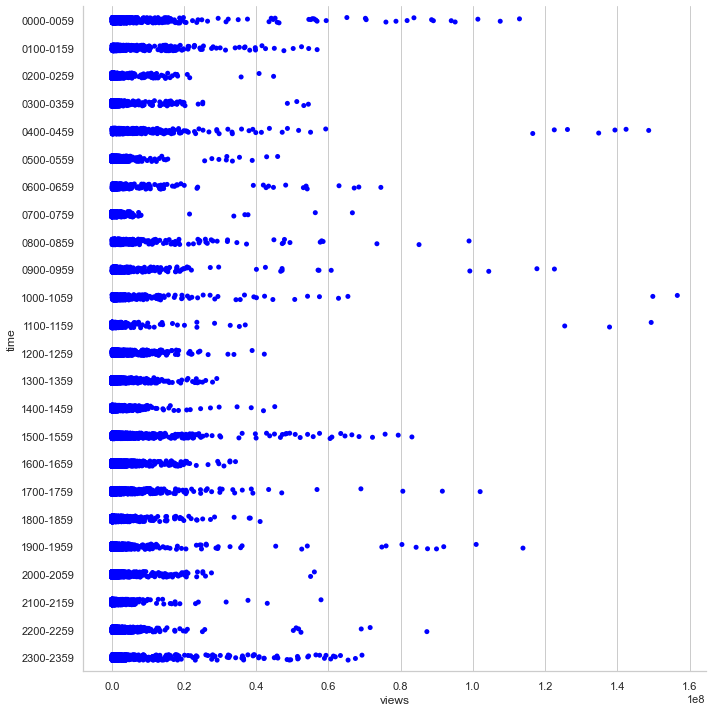

In [44]:
f = plt.figure(figsize=(16, 8))
hourlyviews = pd.concat([time, views], axis = 1)
sb.catplot(x="views", y="time", order=["0000-0059", "0100-0159", "0200-0259", "0300-0359", "0400-0459", "0500-0559", "0600-0659", "0700-0759", "0800-0859", "0900-0959", "1000-1059", "1100-1159", "1200-1259", "1300-1359", "1400-1459", "1500-1559", "1600-1659", "1700-1759", "1800-1859", "1900-1959", "2000-2059", "2100-2159", "2200-2259", "2300-2359"], data=hourlyviews, color='blue', height=10)

In [45]:
# Calculate the quartiles
Q1 = dailyviews['views'].quantile(0.25)
Q3 = dailyviews['views'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
newhourlyviews=hourlyviews[(hourlyviews['views']<upper)&(hourlyviews['views']>lower)]

<AxesSubplot:xlabel='views', ylabel='time'>

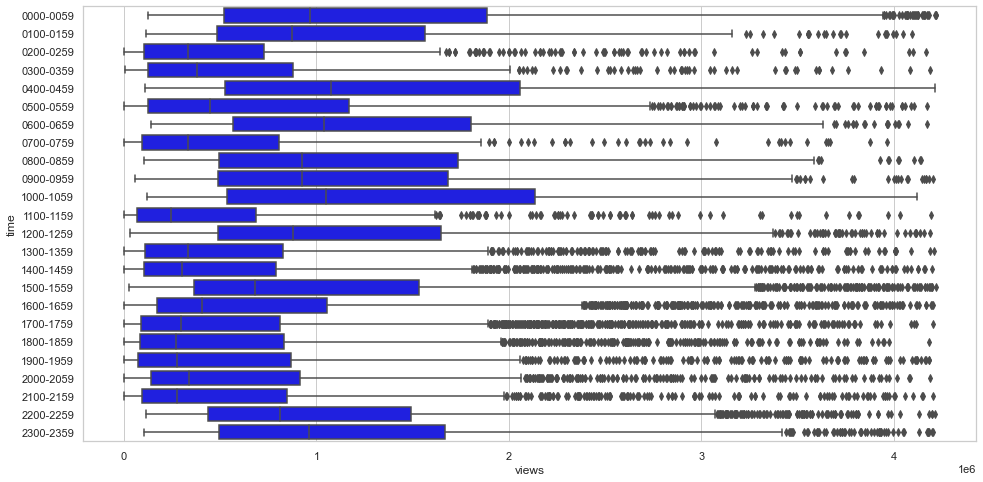

In [46]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="views", y="time", order=["0000-0059", "0100-0159", "0200-0259", "0300-0359", "0400-0459", "0500-0559", "0600-0659", "0700-0759", "0800-0859", "0900-0959", "1000-1059", "1100-1159", "1200-1259", "1300-1359", "1400-1459", "1500-1559", "1600-1659", "1700-1759", "1800-1859", "1900-1959", "2000-2059", "2100-2159", "2200-2259", "2300-2359"], data=newhourlyviews, color='blue')

<code style="background:yellow;color:black"><strong>0400hrs to 0459hrs and 1000hrs to 1059hrs has the largest interquartile range and similar median number of views.</strong></code>

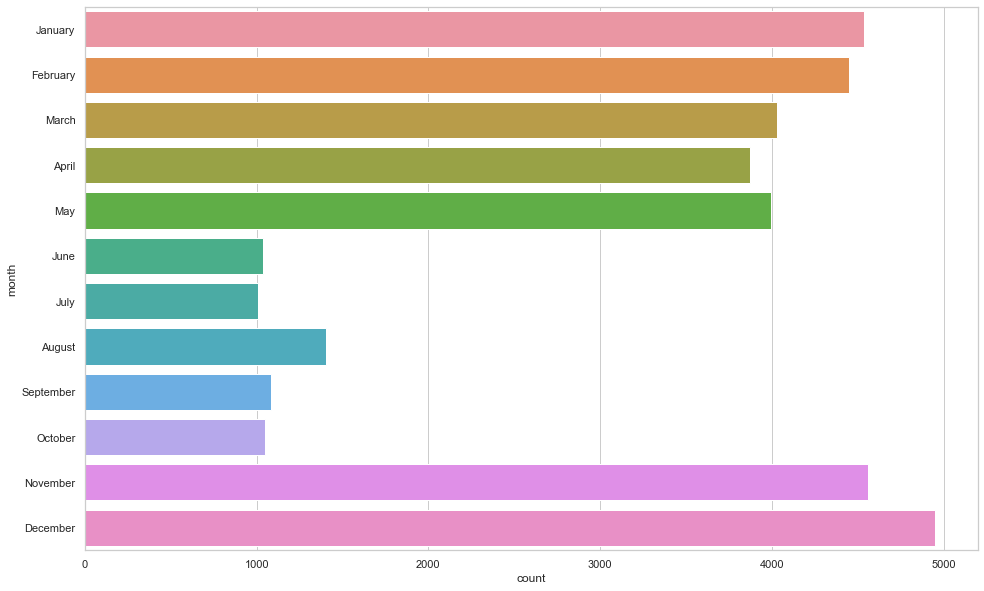

In [47]:
january = pd.DataFrame(date_data_ohe[["month_1"]])
january1 = pd.DataFrame(january.replace(1.0, 'January'))
january0 = pd.DataFrame(january1.replace(0.0, ''))

february = pd.DataFrame(date_data_ohe[["month_2"]])
february1 = pd.DataFrame(february.replace(1.0, 'February'))
february0 = pd.DataFrame(february1.replace(0.0, ''))

march = pd.DataFrame(date_data_ohe[["month_3"]])
march1 = pd.DataFrame(march.replace(1.0, 'March'))
march0 = pd.DataFrame(march1.replace(0.0, ''))

april = pd.DataFrame(date_data_ohe[["month_4"]])
april1 = pd.DataFrame(april.replace(1.0, 'April'))
april0 = pd.DataFrame(april1.replace(0.0, ''))

may = pd.DataFrame(date_data_ohe[["month_5"]])
may1 = pd.DataFrame(may.replace(1.0, 'May'))
may0 = pd.DataFrame(may1.replace(0.0, ''))

june = pd.DataFrame(date_data_ohe[["month_6"]])
june1 = pd.DataFrame(june.replace(1.0, 'June'))
june0 = pd.DataFrame(june1.replace(0.0, ''))

july = pd.DataFrame(date_data_ohe[["month_7"]])
july1 = pd.DataFrame(july.replace(1.0, 'July'))
july0 = pd.DataFrame(july1.replace(0.0, ''))

august = pd.DataFrame(date_data_ohe[["month_8"]])
august1 = pd.DataFrame(august.replace(1.0, 'August'))
august0 = pd.DataFrame(august1.replace(0.0, ''))

september = pd.DataFrame(date_data_ohe[["month_9"]])
september1 = pd.DataFrame(september.replace(1.0, 'September'))
september0 = pd.DataFrame(september1.replace(0.0, ''))

october = pd.DataFrame(date_data_ohe[["month_10"]])
october1 = pd.DataFrame(october.replace(1.0, 'October'))
october0 = pd.DataFrame(october1.replace(0.0, ''))

november = pd.DataFrame(date_data_ohe[["month_11"]])
november1 = pd.DataFrame(november.replace(1.0, 'November'))
november0 = pd.DataFrame(november1.replace(0.0, ''))

december = pd.DataFrame(date_data_ohe[["month_12"]])
december1 = pd.DataFrame(december.replace(1.0, 'December'))
december0 = pd.DataFrame(december1.replace(0.0, ''))

f = plt.figure(figsize=(16, 10))
monthconcat = pd.concat([january0, february0, march0, april0, may0, june0, july0, august0, september0, october0, november0, december0], axis = 1)
monthconcat['month'] = monthconcat['month_1'] + monthconcat['month_2'] + monthconcat['month_3'] + monthconcat['month_4'] + monthconcat['month_5'] + monthconcat['month_6'] + monthconcat['month_7'] + monthconcat['month_8'] + monthconcat['month_9'] + monthconcat['month_10'] + monthconcat['month_11'] + monthconcat['month_12']
month = pd.DataFrame(monthconcat[['month']])

monthdf2 = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'num': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})
month = pd.merge(month, monthdf2, on='month')
month = month.sort_values('num')

monthplot = sb.countplot(y = "month", data = month) 

<code style="background:yellow;color:black"><strong>New video contents are generated more during the months of January, February, November and December as >4000 videos are generated per month.</strong></code>

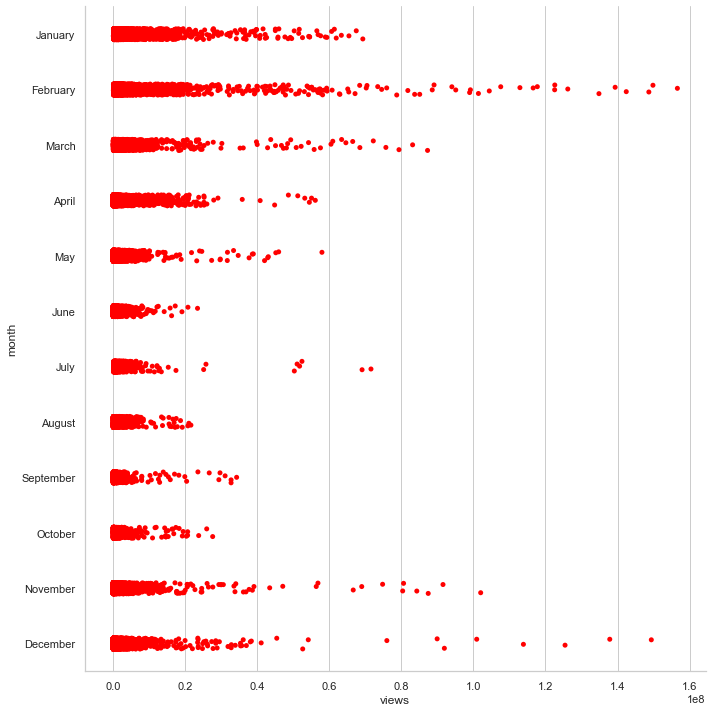

In [48]:
monthlyviews = pd.concat([month, views], axis = 1)
sb.catplot(x="views", y="month", order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], data=monthlyviews, color='red', height = 10)

In [49]:
# Calculate the quartiles
Q1 = dailyviews['views'].quantile(0.25)
Q3 = dailyviews['views'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
newmonthlyviews=monthlyviews[(monthlyviews['views']<upper)&(monthlyviews['views']>lower)]

<AxesSubplot:xlabel='views', ylabel='month'>

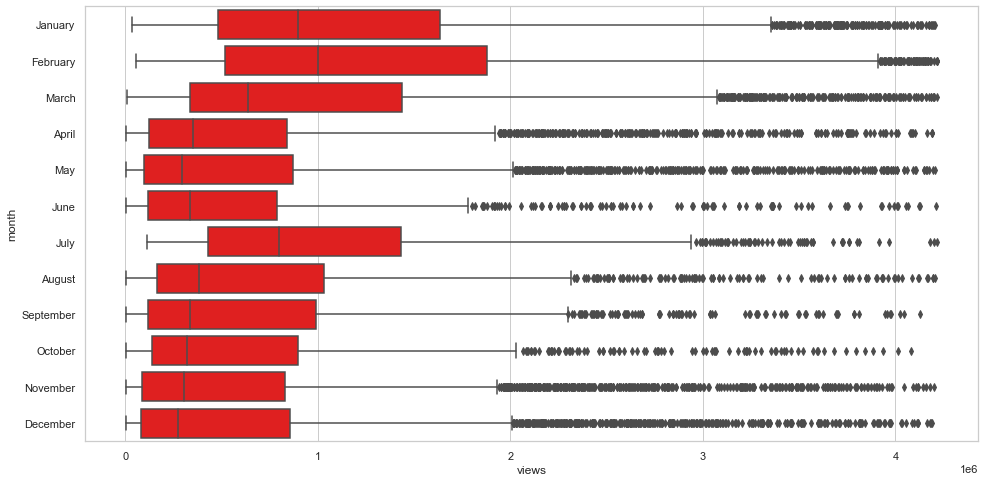

In [50]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="views", y="month", order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], data=newmonthlyviews, color='red')

<code style="background:yellow;color:black"><strong>February has the highest median number of views out of all 12 months, with the largest interquartile range as well.</strong></code>

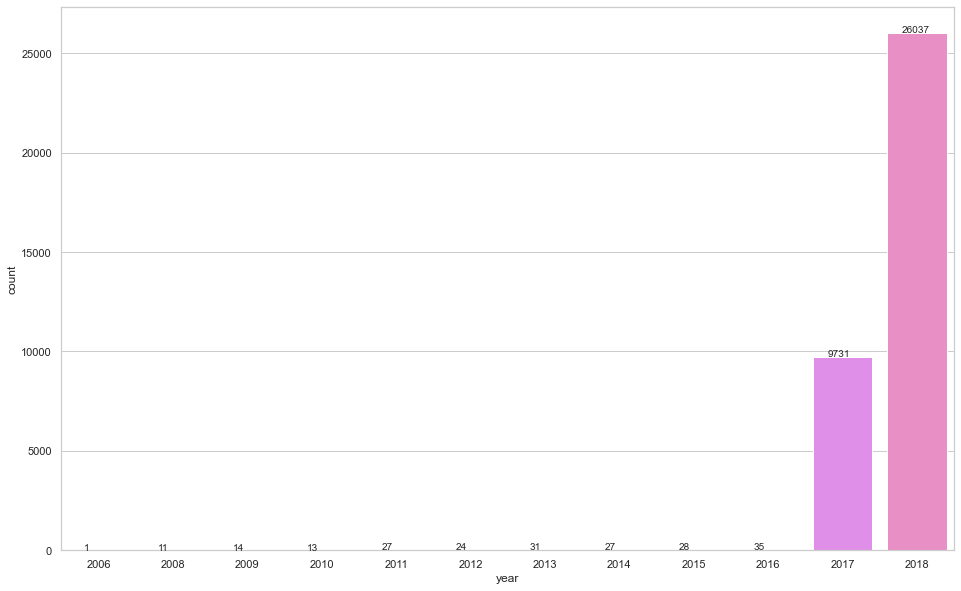

In [51]:
year2006 = pd.DataFrame(date_data_ohe['year_2006'])
year2006a = pd.DataFrame(year2006.replace(1.0, '2006'))
year2006b = pd.DataFrame(year2006a.replace(0.0, ''))

year2008 = pd.DataFrame(date_data_ohe['year_2008'])
year2008a = pd.DataFrame(year2008.replace(1.0, '2008'))
year2008b = pd.DataFrame(year2008a.replace(0.0, ''))

year2009 = pd.DataFrame(date_data_ohe['year_2009'])
year2009a = pd.DataFrame(year2009.replace(1.0, '2009'))
year2009b = pd.DataFrame(year2009a.replace(0.0, ''))

year2010 = pd.DataFrame(date_data_ohe['year_2010'])
year2010a = pd.DataFrame(year2010.replace(1.0, '2010'))
year2010b = pd.DataFrame(year2010a.replace(0.0, ''))

year2011 = pd.DataFrame(date_data_ohe['year_2011'])
year2011a = pd.DataFrame(year2011.replace(1.0, '2011'))
year2011b = pd.DataFrame(year2011a.replace(0.0, ''))

year2012 = pd.DataFrame(date_data_ohe['year_2012'])
year2012a = pd.DataFrame(year2012.replace(1.0, '2012'))
year2012b = pd.DataFrame(year2012a.replace(0.0, ''))

year2013 = pd.DataFrame(date_data_ohe['year_2013'])
year2013a = pd.DataFrame(year2013.replace(1.0, '2013'))
year2013b = pd.DataFrame(year2013a.replace(0.0, ''))

year2014 = pd.DataFrame(date_data_ohe['year_2014'])
year2014a = pd.DataFrame(year2014.replace(1.0, '2014'))
year2014b = pd.DataFrame(year2014a.replace(0.0, ''))

year2015 = pd.DataFrame(date_data_ohe['year_2015'])
year2015a = pd.DataFrame(year2015.replace(1.0, '2015'))
year2015b = pd.DataFrame(year2015a.replace(0.0, ''))

year2016 = pd.DataFrame(date_data_ohe['year_2016'])
year2016a = pd.DataFrame(year2016.replace(1.0, '2016'))
year2016b = pd.DataFrame(year2016a.replace(0.0, ''))

year2017 = pd.DataFrame(date_data_ohe['year_2017'])
year2017a = pd.DataFrame(year2017.replace(1.0, '2017'))
year2017b = pd.DataFrame(year2017a.replace(0.0, ''))

year2018 = pd.DataFrame(date_data_ohe['year_2018'])
year2018a = pd.DataFrame(year2018.replace(1.0, '2018'))
year2018b = pd.DataFrame(year2018a.replace(0.0, ''))

yearconcat = pd.concat([year2006b, year2008b, year2009b, year2010b, year2011b, year2012b, year2013b, year2014b, year2015b, year2016b, year2017b, year2018b], axis = 1)
yearconcat['year'] = yearconcat['year_2006'] + yearconcat['year_2008'] + yearconcat['year_2009'] + yearconcat['year_2010'] + yearconcat['year_2011'] + yearconcat['year_2012'] + yearconcat['year_2013'] + yearconcat['year_2014'] + yearconcat['year_2015'] + yearconcat['year_2016'] + yearconcat['year_2017'] + yearconcat['year_2018']
year = pd.DataFrame(yearconcat[['year']])

yeardf2 = pd.DataFrame({
    'year': ['2006', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
    'num': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})
year = pd.merge(year, yeardf2, on='year')
year = year.sort_values('num')

f = plt.figure(figsize=(16, 10))
yearplot = sb.countplot(x = "year", data = year)
for p in yearplot.patches:
   yearplot.annotate('{:}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))

<code style="background:yellow;color:black"><strong>From this countplot, we can derive that most of the data in the YouTube dataset lies in 2017 & 2018.</strong></code>

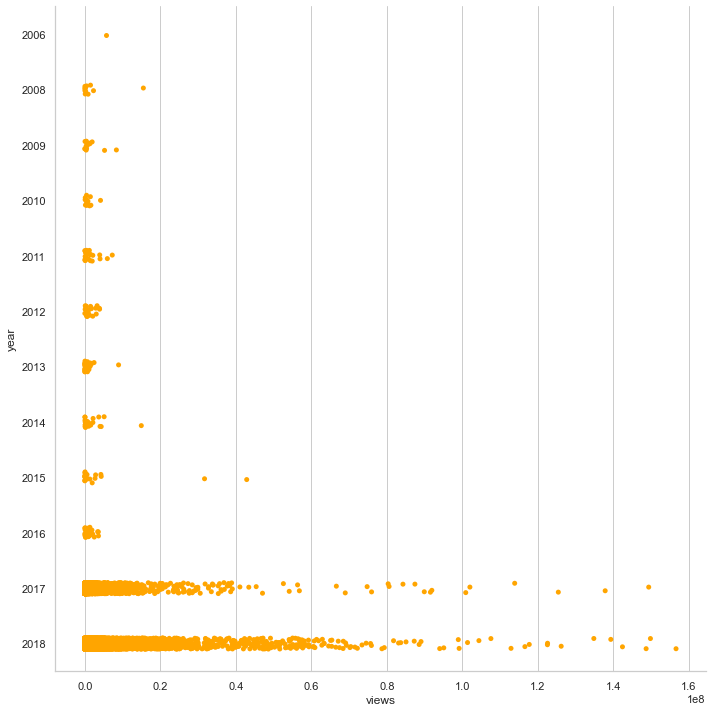

In [52]:
yearlyviews = pd.concat([year, views], axis = 1)
sb.catplot(x="views", y="year", order=["2006", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"], data=yearlyviews, color='orange', height = 10)

In [53]:
# Calculate the quartiles
Q1 = dailyviews['views'].quantile(0.25)
Q3 = dailyviews['views'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
newyearlyviews=yearlyviews[(yearlyviews['views']<upper)&(yearlyviews['views']>lower)]

<AxesSubplot:xlabel='views', ylabel='year'>

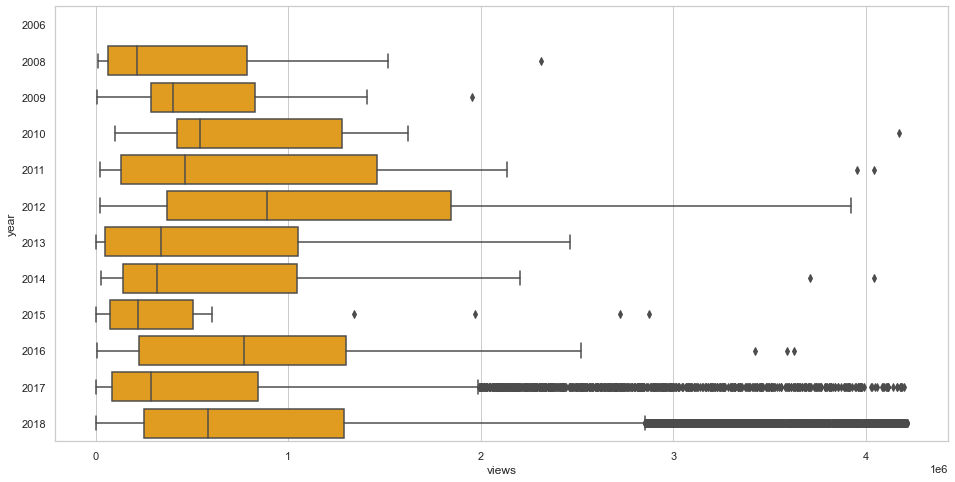

In [54]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="views", y="year", order=["2006", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"], data=newyearlyviews, color='orange')

<code style="background:yellow;color:black"><strong>Year is not a good variable to predict views.</strong></code>

<h1 align="center">Data Preparation</h1>

In [55]:
#see the number of duplicate data
numeric_data.duplicated().sum()

47

In [56]:
#dropping duplicate data
numeric_data= numeric_data.drop_duplicates()

In [57]:
numeric_data.drop_duplicates()

,category_id,views,likes,dislikes,comment_count,No_tags,len_title,desc_len,publish_time_new,Ratio_View_likes,Ratio_View_dislikes,Ratio_views_comment_count,Ratio_likes_dislikes
0,22,748374,57527,2966,15954,1,34,1410,1,13.00900,252.31800,46.90800,19.39500
1,24,2418783,97185,6146,12703,4,62,630,1,24.88800,393.55400,190.41000,15.81300
2,23,3191434,146033,5339,8181,23,53,1177,0,21.85400,597.75900,390.10300,27.35200
3,24,343168,10172,666,2146,27,32,1403,1,33.73700,515.26700,159.91100,15.27300
4,24,2095731,132235,1989,17518,14,24,636,0,15.84900,1053.66100,119.63300,66.48300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,22,8259128,645888,4052,62610,27,52,926,5,12.78700,2038.28400,131.91400,159.40000
40944,15,1685609,38160,1385,2657,14,28,46,5,44.17200,1217.04600,634.40300,27.55200
40946,24,1066451,48068,1032,3992,24,84,775,5,22.18600,1033.38300,267.14700,46.57800
40947,1,5660813,192957,2846,13088,22,35,3268,4,29.33700,1989.04200,432.51900,67.79900


In [58]:
numeric_data.duplicated().sum()

0

<code style="background:yellow;color:black"><strong>Based on the EDA done above there is little relationship with views for Ratio_View_likes", "Ratio_View_dislikes", "Ratio_views_comment_count", "Ratio_likes_dislikes and publish time and date. Thus we will be removing them.</strong></code>

In [59]:
numeric_data=numeric_data.drop(["Ratio_View_likes","Ratio_View_dislikes","Ratio_views_comment_count","Ratio_likes_dislikes"], axis=1)

In [60]:
numeric_data.drop(['publish_time_new'], axis=1)

,category_id,views,likes,dislikes,comment_count,No_tags,len_title,desc_len
0,22,748374,57527,2966,15954,1,34,1410
1,24,2418783,97185,6146,12703,4,62,630
2,23,3191434,146033,5339,8181,23,53,1177
3,24,343168,10172,666,2146,27,32,1403
4,24,2095731,132235,1989,17518,14,24,636
...,...,...,...,...,...,...,...,...
40943,22,8259128,645888,4052,62610,27,52,926
40944,15,1685609,38160,1385,2657,14,28,46
40946,24,1066451,48068,1032,3992,24,84,775
40947,1,5660813,192957,2846,13088,22,35,3268


<code style="background:yellow;color:black"><strong>Transforming the variables with logs to show a clearer relationship</strong></code>

In [61]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','len_title',"desc_len"]

df_new = numeric_data.copy()
for var in features:
    df_new['log_'+var]= (numeric_data[var]+1).apply(np.log)


In [62]:
df_new

,category_id,views,likes,dislikes,comment_count,No_tags,len_title,desc_len,publish_time_new,log_category_id,log_views,log_likes,log_dislikes,log_comment_count,log_No_tags,log_len_title,log_desc_len
0,22,748374,57527,2966,15954,1,34,1410,1,3.13549,13.52566,10.96003,7.99531,9.67753,0.69315,3.55535,7.25205
1,24,2418783,97185,6146,12703,4,62,630,1,3.21888,14.69878,11.48438,8.72372,9.44967,1.60944,4.14313,6.44731
2,23,3191434,146033,5339,8181,23,53,1177,0,3.17805,14.97598,11.89159,8.58298,9.00969,3.17805,3.98898,7.07157
3,24,343168,10172,666,2146,27,32,1403,1,3.21888,12.74598,9.22749,6.50279,7.67183,3.33220,3.49651,7.24708
4,24,2095731,132235,1989,17518,14,24,636,0,3.21888,14.55541,11.79234,7.59589,9.77104,2.70805,3.21888,6.45677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,22,8259128,645888,4052,62610,27,52,926,5,3.13549,15.92683,13.37838,8.30721,11.04470,3.33220,3.97029,6.83195
40944,15,1685609,38160,1385,2657,14,28,46,5,2.77259,14.33764,10.54957,7.23418,7.88533,2.70805,3.36730,3.85015
40946,24,1066451,48068,1032,3992,24,84,775,5,3.21888,13.87985,10.78039,6.94022,8.29230,3.21888,4.44265,6.65415
40947,1,5660813,192957,2846,13088,22,35,3268,4,0.69315,15.54908,12.17023,7.95402,9.47953,3.13549,3.58352,8.09224


In [63]:
for var in features:
    df_new['std_'+var]= MinMaxScaler().fit_transform(df_new[var].values.reshape(len(df_new), 1))

In [64]:
df_new

,category_id,views,likes,dislikes,comment_count,No_tags,len_title,desc_len,publish_time_new,log_category_id,log_views,log_likes,log_dislikes,log_comment_count,log_No_tags,log_len_title,log_desc_len,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_len_title,std_desc_len
0,22,748374,57527,2966,15954,1,34,1410,1,3.13549,13.52566,10.96003,7.99531,9.67753,0.69315,3.55535,7.25205,0.50000,0.00332,0.01025,0.00181,0.01298,0.00000,0.31959,0.27509
1,24,2418783,97185,6146,12703,4,62,630,1,3.21888,14.69878,11.48438,8.72372,9.44967,1.60944,4.14313,6.44731,0.54762,0.01074,0.01731,0.00374,0.01034,0.04412,0.60825,0.12280
2,23,3191434,146033,5339,8181,23,53,1177,0,3.17805,14.97598,11.89159,8.58298,9.00969,3.17805,3.98898,7.07157,0.52381,0.01417,0.02601,0.00325,0.00666,0.32353,0.51546,0.22960
3,24,343168,10172,666,2146,27,32,1403,1,3.21888,12.74598,9.22749,6.50279,7.67183,3.33220,3.49651,7.24708,0.54762,0.00152,0.00181,0.00041,0.00175,0.38235,0.29897,0.27372
4,24,2095731,132235,1989,17518,14,24,636,0,3.21888,14.55541,11.79234,7.59589,9.77104,2.70805,3.21888,6.45677,0.54762,0.00930,0.02356,0.00121,0.01426,0.19118,0.21649,0.12398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,22,8259128,645888,4052,62610,27,52,926,5,3.13549,15.92683,13.37838,8.30721,11.04470,3.33220,3.97029,6.83195,0.50000,0.03667,0.11505,0.00247,0.05096,0.38235,0.50515,0.18059
40944,15,1685609,38160,1385,2657,14,28,46,5,2.77259,14.33764,10.54957,7.23418,7.88533,2.70805,3.36730,3.85015,0.33333,0.00748,0.00680,0.00084,0.00216,0.19118,0.25773,0.00879
40946,24,1066451,48068,1032,3992,24,84,775,5,3.21888,13.87985,10.78039,6.94022,8.29230,3.21888,4.44265,6.65415,0.54762,0.00473,0.00856,0.00063,0.00325,0.33824,0.83505,0.15111
40947,1,5660813,192957,2846,13088,22,35,3268,4,0.69315,15.54908,12.17023,7.95402,9.47953,3.13549,3.58352,8.09224,0.00000,0.02513,0.03437,0.00173,0.01065,0.30882,0.32990,0.63784


<AxesSubplot:>

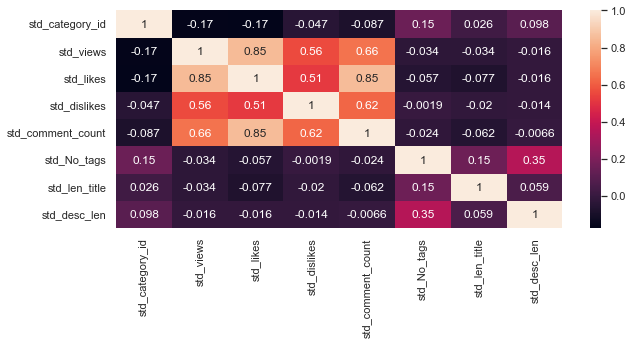

In [65]:
sb.set(rc={'figure.figsize':(10,4)})
sb.heatmap(df_new[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_len_title',"std_desc_len"]].corr(), annot=True)

<h1 align="center">Predicting views with numeric variables</h1>

## Spliting the train, test data

In [66]:
x = df_new[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_len_title',"std_desc_len"]] 
y = df_new['std_views']

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [68]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(32265, 7) (8067, 7) (32265,) (8067,)


## Attempt 1: Simple linear regression model

In [73]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(xtrain, ytrain)

# predicting the  test set results
y_pred = model.predict(xtest)
print('Root means score', np.sqrt(mean_squared_error(ytest, y_pred)))
print("Result :",model.score(xtest, ytest))
print("MAE: %f" % mean_absolute_error(ytest, y_pred)) # The MAE
print("RMSE: %.2f" % mean_squared_error(ytest, y_pred, squared=False)) # The RMSE
print('R2 score: %f' % r2_score(ytest, y_pred)) # Explained variance score: 1 is perfect prediction
d1 = {'True Labels': ytest, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 0.016547764904419948
Result : 0.8005435039640697
MAE: 0.005588
RMSE: 0.02
R2 score: 0.800544
       True Labels  Predicted Labels
26333      0.01391           0.06193
6450       0.00082           0.00364
37085      0.01598           0.00942
9493       0.00321           0.00738
6940       0.00102           0.00351
...            ...               ...
7866       0.00003           0.00009
7921       0.02854           0.03272
6287       0.00023           0.00053
5323       0.00112           0.00370
8372       0.00233           0.00461

[8067 rows x 2 columns]


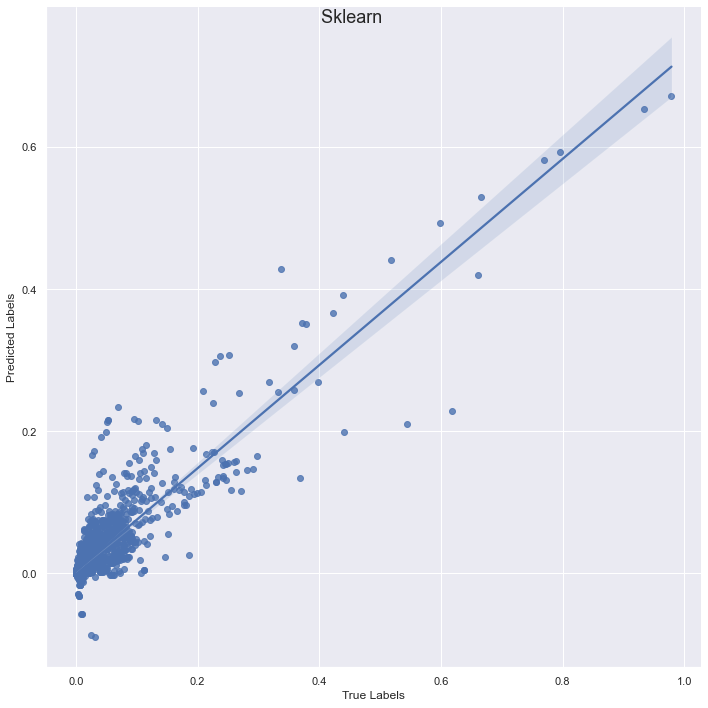

In [74]:
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

## Attempt 2: Fit Ridge Regularization Model

In [75]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

Coefficients: 
 [-0.00310388  0.76161956  0.47497906 -0.33655838  0.00268329  0.00365647
 -0.00077464]
Intercept: 
 0.0006611717274021423
MAE: 0.005563
RMSE: 0.02
R2 score: 0.788757
       True Labels  Predicted Labels
26333      0.01391           0.05874
6450       0.00082           0.00395
37085      0.01598           0.00926
9493       0.00321           0.00712
6940       0.00102           0.00414
...            ...               ...
7866       0.00003           0.00035
7921       0.02854           0.03052
6287       0.00023           0.00066
5323       0.00112           0.00375
8372       0.00233           0.00514

[8067 rows x 2 columns]


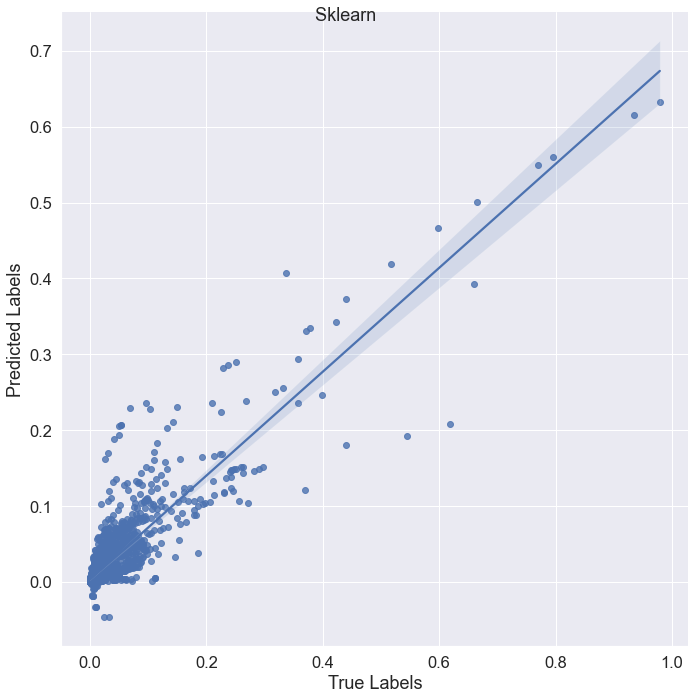

In [77]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

## Cross validation with Randomized Search on attempt 2 model

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

MAE: 0.010000
RMSE: 0.03
R2 score: 0.301077
       True Labels  Predicted Labels
26333      0.01391           0.01938
6450       0.00082           0.00835
37085      0.01598           0.00715
9493       0.00321           0.00819
6940       0.00102           0.01264
...            ...               ...
7866       0.00003           0.00623
7921       0.02854           0.01365
6287       0.00023           0.00586
5323       0.00112           0.00655
8372       0.00233           0.01263

[8067 rows x 2 columns]


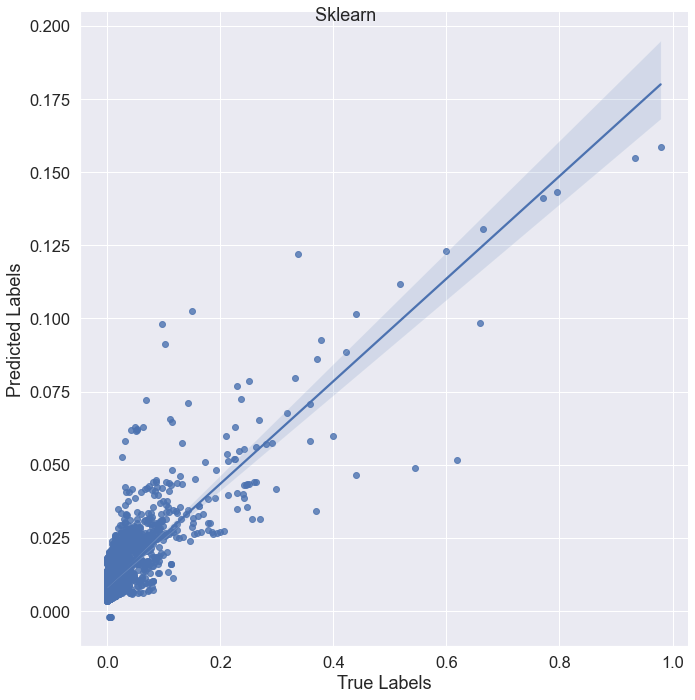

In [79]:


pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)
d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

## Attempt 3:  Elastic Net Regularization Model

In [80]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

MAE: 0.012601
RMSE: 0.04
R2 score: -0.000573
MAE: 0.012601
RMSE: 0.04
R2 score: -0.000573
       True Labels  Predicted Labels
26333      0.01391           0.01035
6450       0.00082           0.01035
37085      0.01598           0.01035
9493       0.00321           0.01035
6940       0.00102           0.01035
...            ...               ...
7866       0.00003           0.01035
7921       0.02854           0.01035
6287       0.00023           0.01035
5323       0.00112           0.01035
8372       0.00233           0.01035

[8067 rows x 2 columns]


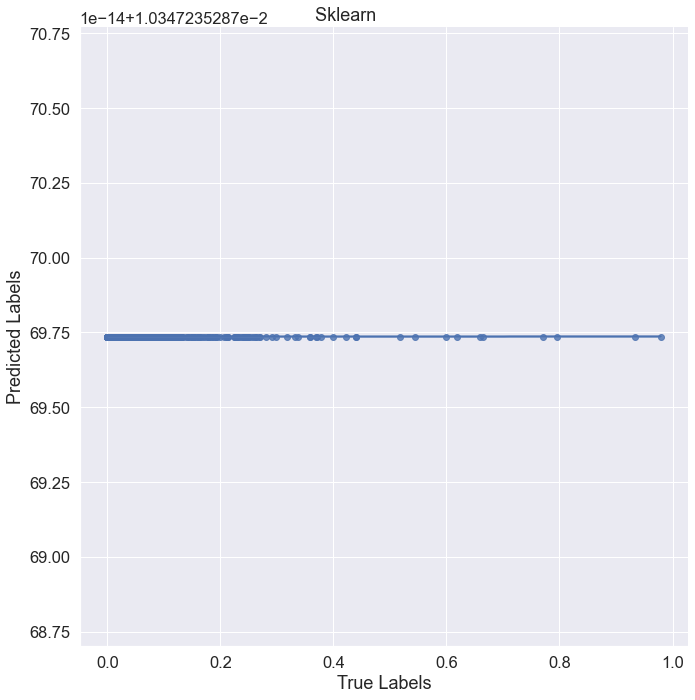

In [81]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)
d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

## Cross validation with Randomized Search on attempt 3 model

MAE: 0.005588
RMSE: 0.02
R2 score: 0.800544
       True Labels  Predicted Labels
26333      0.01391           0.06193
6450       0.00082           0.00364
37085      0.01598           0.00942
9493       0.00321           0.00738
6940       0.00102           0.00351
...            ...               ...
7866       0.00003           0.00009
7921       0.02854           0.03272
6287       0.00023           0.00053
5323       0.00112           0.00370
8372       0.00233           0.00461

[8067 rows x 2 columns]


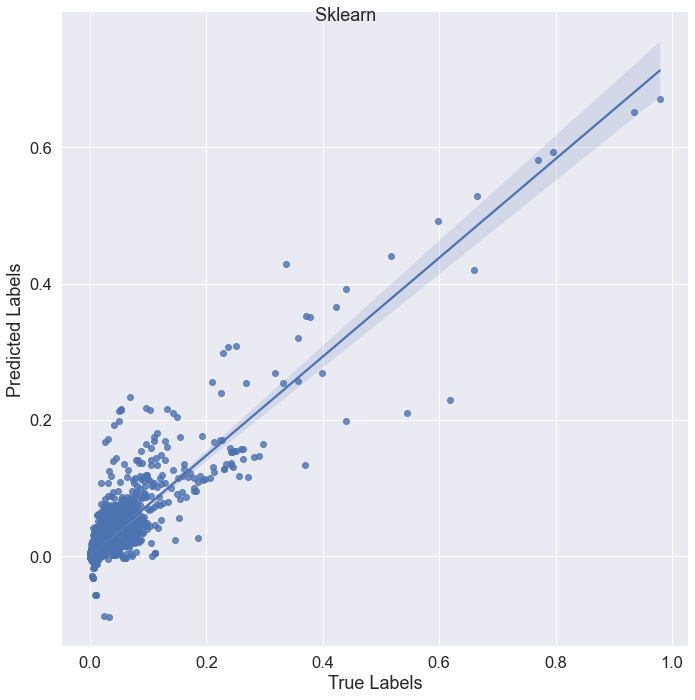

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)
d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)


## Attempt 4: Decision Tree Model

MAE: 0.001581
RMSE: 0.01
R2 score: 0.949092
       True Labels  Predicted Labels
26333      0.01391           0.01375
6450       0.00082           0.00096
37085      0.01598           0.01595
9493       0.00321           0.00327
6940       0.00102           0.00111
...            ...               ...
7866       0.00003           0.00011
7921       0.02854           0.02925
6287       0.00023           0.00075
5323       0.00112           0.00116
8372       0.00233           0.00205

[8067 rows x 2 columns]


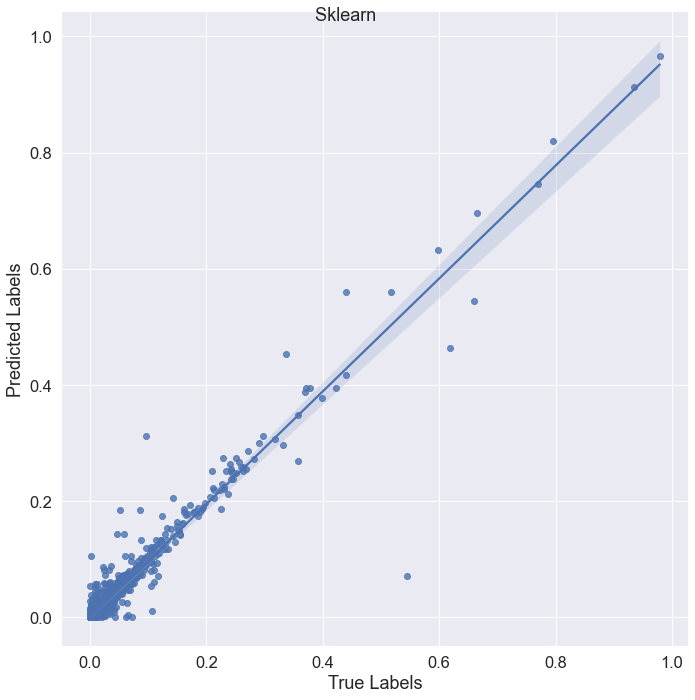

In [83]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)
d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

## Attempt 5: Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.001316
RMSE: 0.01
R2 score: 0.964226


       True Labels  Predicted Labels
26333      0.01391           0.01483
6450       0.00082           0.00144
37085      0.01598           0.01596
9493       0.00321           0.00432
6940       0.00102           0.00105
...            ...               ...
7866       0.00003           0.00018
7921       0.02854           0.02883
6287       0.00023           0.00038
5323       0.00112           0.00127
8372       0.00233           0.00243

[8067 rows x 2 columns]


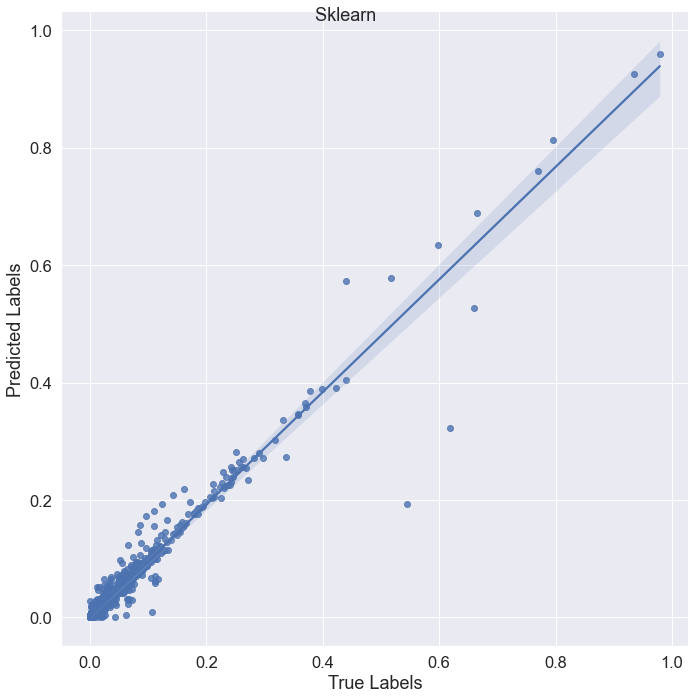

In [85]:
d = {'True Labels': ytest, 'Predicted Labels': pred}
SK = pd.DataFrame(data = d)
print(SK)
lm1 = sb.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sb.set(font_scale = 1.5)

<code style="background:yellow;color:black"><strong>As we can observe attempt 5 has the best model with 
MAE: 0.00
RMSE: 0.00
R2 score: 0.96</strong></code>

<h1 align="center">Attempt to apply a model to predict views using date, time variable</h1>

In [124]:
# Extract Response and Predictors
date_data_ohe['views']=ydata['views']
y = pd.DataFrame(new_df['views'])
X = pd.DataFrame(date_data_ohe.drop('views', axis = 1))
print(y.shape)
print(X.shape)


(35979, 1)
(35979, 86)


In [128]:
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)


MAE: 429035.29
RMSE: 662676.38
R2 score: 0.51


<code style="background:yellow;color:black"><strong>As we can see from the variance, root mean square error and mean absolute error, publish_date is not a good variable to be used to predict views.</strong></code>

<h1 align="center">Predicting views with string variable: tags</h1>

In [131]:
# Split the dataset into 80:20 ratio for train and test
x_train, x_test, y_train, y_test = train_test_split(data_newyear["tags_clean"], data_newyear['highview'], test_size=0.2)
print("total data: \t",data_newyear.shape)
print("train data: \t",x_train.shape, y_train.shape)
print("test data: \t",x_test.shape, y_test.shape)

total data: 	 (29909, 27)
train data: 	 (23927,) (23927,)
test data: 	 (5982,) (5982,)


In [132]:
# Transform text into matrix based on frequency of text occurence
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Get the unique words of the tags
feature_names = vectorizer.get_feature_names ()
print("Number of features: {}".format(len(feature_names)))

Number of features: 17399


<code style="background:yellow;color:black"><strong>Using different models, we try to find the best model for predicting highview based on the tags. We will be using 3 models:</strong></code>
* <code style="background:yellow;color:black"><strong>LogisticRegression</strong></code>
* <code style="background:yellow;color:black"><strong>NaiveBayes</strong></code>
* <code style="background:yellow;color:black"><strong>RandomForest</strong></code>

<code style="background:yellow;color:black"><strong>To compare the accuracy of the models, we compare the set scores and FPR, FNR</strong></code>

## Using LogisticRegression

Mean cross-validation accuracy 	: 0.93
Training set accuracy 	: 0.948
Test set accuracy 	: 0.936

Train Dataset
True Positive Rate 	: 0.910233918128655
False Positive Rate 	: 0.03727980335927898
F1-Score 		: 0.9087061227468437

Test Dataset
True Positive Rate 	: 0.8883305415968733
False Positive Rate 	: 0.043664996420901936
F1-Score 		: 0.8925666199158485


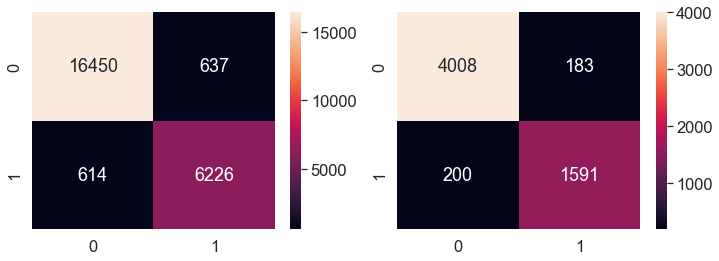

In [133]:
# Fit the variables onto the LogisticRegression Model
# Increased maximum interations to ensure algorithm converges
logreg = LogisticRegression(max_iter=1000)
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display accuracy of model for ease of comparison
scores = cross_val_score(logreg, x_train, y_train, cv=5 )
print("Mean cross-validation accuracy \t: {:.2f}".format(np.mean(scores)))
logreg.fit(x_train,y_train)
print("Training set accuracy \t: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set accuracy \t: {:.3f}".format(logreg.score(x_test, y_test)))

# Plot the Confusion Matrix for train and test
pred_xtrain = logreg.predict(x_train)
confusionlogreg_train = confusion_matrix(y_train, pred_xtrain)
sb.heatmap(confusionlogreg_train, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[0])
tn1, fp1, fn1, tp1 = confusionlogreg_train.ravel()

pred_xtest = logreg.predict(x_test)
confusionlogreg_test = confusion_matrix(y_test, pred_xtest)
sb.heatmap(confusionlogreg_test, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[1])
tn2, fp2, fn2, tp2 = confusionlogreg_test.ravel()

print("\nTrain Dataset")
print("True Positive Rate \t:", (tp1/(tp1+fn1)))
print("False Positive Rate \t:", (fp1/(fp1+tn1)))
print("F1-Score \t\t:", (2*tp1)/(2*tp1+fp1+fn1))
print()
print("Test Dataset")
print("True Positive Rate \t:", tp2/(tp2+fn2))
print("False Positive Rate \t:", fp2/(fp2+tn2))
print("F1-Score \t\t:", (2*tp2)/(2*tp2+fp2+fn2))

## Using NaiveBayes

Mean cross-validation accuracy 	: 0.88
Training set accuracy 	: 0.897
Test set accuracy 	: 0.883

Train Dataset
True Positive Rate 	: 0.8774853801169591
False Positive Rate 	: 0.09556973137472932
F1-Score 		: 0.8292918825561313

Test Dataset
True Positive Rate 	: 0.852037967615857
False Positive Rate 	: 0.10427105702696254
F1-Score 		: 0.8129994672349494


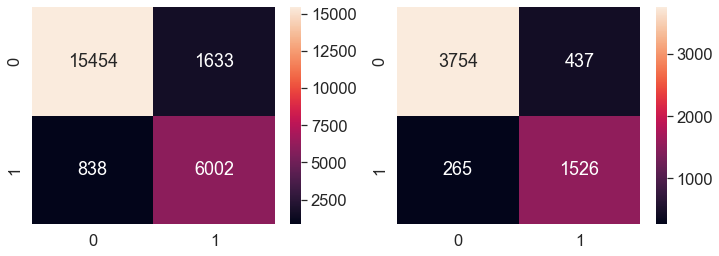

In [134]:
# Fit the variables onto the NaiveBayes Model
naiive = MultinomialNB()
naiive.fit(x_train, y_train)
scores = cross_val_score(naiive, x_train, y_train, cv=5 )
print("Mean cross-validation accuracy \t: {:.2f}".format(np.mean(scores)))
print("Training set accuracy \t: {:.3f}".format(naiive.score(x_train, y_train)))
print("Test set accuracy \t: {:.3f}".format(naiive.score(x_test, y_test)))

# Plot the Confusion Matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
pred_xtrain = naiive.predict(x_train)
confusionnb_train = confusion_matrix(y_train, pred_xtrain)
sb.heatmap(confusionnb_train, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[0])
tn3, fp3, fn3, tp3 = confusionnb_train.ravel()

pred_xtest = naiive.predict(x_test)
confusionnb_test = confusion_matrix(y_test, pred_xtest)
sb.heatmap(confusionnb_test, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[1])
tn4, fp4, fn4, tp4 = confusionnb_test.ravel()

print("\nTrain Dataset")
print("True Positive Rate \t:", (tp3/(tp3+fn3)))
print("False Positive Rate \t:", (fp3/(fp3+tn3)))
print("F1-Score \t\t:", (2*tp3)/(2*tp3+fp3+fn3))
print()
print("Test Dataset")
print("True Positive Rate \t:", tp4/(tp4+fn4))
print("False Positive Rate \t:", fp4/(fp4+tn4))
print("F1-Score \t\t:", (2*tp4)/(2*tp4+fp4+fn4))

## Using RandomForest

Mean cross-validation accuracy 	: 0.94
Training set accuracy 	: 0.949
Test set accuracy 	: 0.938

Train Dataset
True Positive Rate 	: 0.9201754385964912
False Positive Rate 	: 0.039328144203195414
F1-Score 		: 0.9117774880486745

Test Dataset
True Positive Rate 	: 0.8967057509771078
False Positive Rate 	: 0.043664996420901936
F1-Score 		: 0.8972067039106145


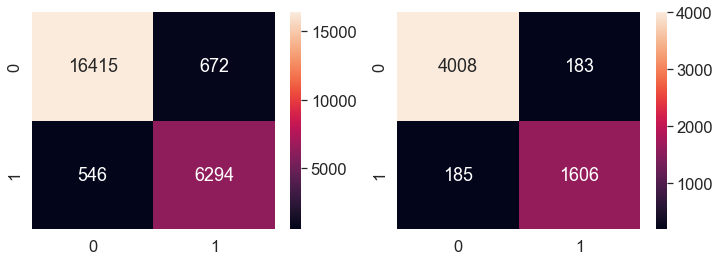

In [135]:
# Fit the variables onto the RandomForest Model
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
scores = cross_val_score(rforest, x_train, y_train, cv=5 )
print("Mean cross-validation accuracy \t: {:.2f}".format(np.mean(scores)))
print("Training set accuracy \t: {:.3f}".format(rforest.score(x_train, y_train)))
print("Test set accuracy \t: {:.3f}".format(rforest.score(x_test, y_test)))

# Plot the Confusion Matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
pred_xtrain = rforest.predict(x_train)
confusionrf_train = confusion_matrix(y_train, pred_xtrain)
sb.heatmap(confusionrf_train, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[0])
tn5, fp5, fn5, tp5 = confusionrf_train.ravel()

pred_xtest = rforest.predict(x_test)
confusionrf_test = confusion_matrix(y_test, pred_xtest)
sb.heatmap(confusionrf_test, annot=True, fmt='g', annot_kws={"size": 18}, ax = axes[1])
tn6, fp6, fn6, tp6 = confusionrf_test.ravel()

print("\nTrain Dataset")
print("True Positive Rate \t:", (tp5/(tp5+fn5)))
print("False Positive Rate \t:", (fp5/(fp5+tn5)))
print("F1-Score \t\t:", (2*tp5)/(2*tp5+fp5+fn5))
print()
print("Test Dataset")
print("True Positive Rate \t:", tp6/(tp6+fn6))
print("False Positive Rate \t:", fp6/(fp6+tn6))
print("F1-Score \t\t:", (2*tp6)/(2*tp6+fp6+fn6))


___
<h1 align="center">Conclusion</h1>

- ***Category ID, Comment Count are correlated to viewcount as seen in our EDA.***
<br>
<br>
- ***There is no clear relationship between tags and viewcounts, however we can conclude that the absence of tags produces no high viewcounts.***
<br>
<br>
- ***Length of title should be kept between 30-70 words and description length should be kepth below 1000 words to produce higher viewcounts.***
<br>
<br>
- ***Despite Youtube content creators puiblishing more videos at certain times, it is not relative in terms of views. As seen in the boxplots: February has the largest interquartile range of views; Thursday has the highest median number of views (1 Million views); time period from 0400HRS-0459HRS and 1000HRS - 1059HRS garners the largest median number of views.***
<br>
<br>
- ***Dataset only holds videos posted mostly in 2017 and 2018, hence lacks the data to reach any copnclusive results with regards to years.***
<br>
<br>
- ***There is a difference in trending tags before 2018 and 2018 onwards, the demand for "game", "makeup" and "challenge" tags are rising 2018 onwards. Creators should look into theses trends for video ideas.***